In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-crypto-stocks-market-data/stocks.csv
/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv


In [5]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Introduction with creative stickers (emojis)
print("🚀 Welcome to Cryptocurrency Market Analysis! 🌟")
print("\nIntroduction:")
print("In the dynamic world of cryptocurrencies, understanding market trends is key to making informed decisions. This analysis dives into historical data from major coins like Bitcoin, Ethereum, and others to uncover patterns in prices, volumes, and changes over time. 💹📈")
print("\nProblem Framing:")
print("The core problem: How have cryptocurrency prices and market caps evolved from March to September 2025? We'll explore volatility, top performers, and potential insights for investors. Can we predict future trends based on 24h/7d changes? 🤔💡")
print("\nDataset Description:")
print("This dataset contains snapshot data for various cryptocurrencies captured at different timestamps from 2025-03-17 to 2025-09-24.")
print("- **Rows**: Approximately 100+ entries (full dataset is larger, truncated here).")
print("- **Columns**:")
print("  - timestamp: Date and time of the snapshot (e.g., '2025-09-24 01:05:12') ⏰")
print("  - name: Full name of the cryptocurrency (e.g., 'Bitcoin') 🏷️")
print("  - symbol: Ticker symbol (e.g., 'BTC') 🔤")
print("  - price_usd: Price in USD (e.g., '112,185.00') 💵")
print("  - vol_24h: 24-hour trading volume (e.g., '$47.94B') 📊")
print("  - total_vol: Percentage of total volume (e.g., '30.70%') 📉")
print("  - chg_24h: 24-hour price change (e.g., '-0.71%') 📈")
print("  - chg_7d: 7-day price change (e.g., '-3.91%') 📅")
print("  - market_cap: Market capitalization (e.g., '$2.23T') 🌐")
print("\nReady to analyze? Let's crypto-crack this data! 🔍🪙")

🚀 Welcome to Cryptocurrency Market Analysis! 🌟

Introduction:
In the dynamic world of cryptocurrencies, understanding market trends is key to making informed decisions. This analysis dives into historical data from major coins like Bitcoin, Ethereum, and others to uncover patterns in prices, volumes, and changes over time. 💹📈

Problem Framing:
The core problem: How have cryptocurrency prices and market caps evolved from March to September 2025? We'll explore volatility, top performers, and potential insights for investors. Can we predict future trends based on 24h/7d changes? 🤔💡

Dataset Description:
This dataset contains snapshot data for various cryptocurrencies captured at different timestamps from 2025-03-17 to 2025-09-24.
- **Rows**: Approximately 100+ entries (full dataset is larger, truncated here).
- **Columns**:
  - timestamp: Date and time of the snapshot (e.g., '2025-09-24 01:05:12') ⏰
  - name: Full name of the cryptocurrency (e.g., 'Bitcoin') 🏷️
  - symbol: Ticker symbol (

In [2]:

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Data Cleaning and Preprocessing Steps
print("🧹 Data Cleaning and Preprocessing for Cryptocurrency Dataset 🧹")
print("\nObjective: Prepare the cryptocurrency dataset for analysis by handling inconsistencies, missing values, formatting issues, and ensuring robust type conversions.")

# Step 1: Inspect the dataset
print("\n1️⃣ Initial Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Step 2: Convert 'timestamp' to datetime
print("\n2️⃣ Converting 'timestamp' to datetime format:")
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print(" - Converted 'timestamp' to datetime. Invalid entries coerced to NaT.")

# Step 3: Clean and convert monetary columns (price_usd, vol_24h, market_cap)
print("\n3️⃣ Cleaning monetary columns (price_usd, vol_24h, market_cap):")
def clean_monetary(value):
    if isinstance(value, str):
        # Remove $ and commas, handle suffixes (K, M, B, T)
        value = value.replace('$', '').replace(',', '')
        try:
            if 'K' in value:
                return float(value.replace('K', '')) * 1_000
            elif 'M' in value:
                return float(value.replace('M', '')) * 1_000_000
            elif 'B' in value:
                return float(value.replace('B', '')) * 1_000_000_000
            elif 'T' in value:
                return float(value.replace('T', '')) * 1_000_000_000_000
            return float(value)
        except ValueError:
            return None  # Handle invalid conversions
    return value

# Apply cleaning to monetary columns
df['price_usd'] = df['price_usd'].apply(clean_monetary)
df['vol_24h'] = df['vol_24h'].apply(clean_monetary)
df['market_cap'] = df['market_cap'].apply(clean_monetary)
print(" - Removed '$' and suffixes (K, M, B, T) from monetary columns and converted to float. Invalid entries set to None.")

# Step 4: Clean percentage columns (total_vol, chg_24h, chg_7d)
print("\n4️⃣ Cleaning percentage columns (total_vol, chg_24h, chg_7d):")
def clean_percentage(value):
    if isinstance(value, str):
        try:
            # Remove % and leading '+' if present, convert to float and divide by 100
            value = value.replace('%', '').replace('+', '').strip()
            return float(value) / 100
        except ValueError:
            print(f"Warning: Could not convert '{value}' to float. Setting to None.")
            return None
    return value

df['total_vol'] = df['total_vol'].apply(clean_percentage)
df['chg_24h'] = df['chg_24h'].apply(clean_percentage)
df['chg_7d'] = df['chg_7d'].apply(clean_percentage)
print(" - Removed '%' and '+' from percentage columns and converted to float (e.g., '0.00%' → 0.0). Invalid entries set to None.")

# Step 5: Handle missing values
print("\n5️⃣ Handling missing values:")
# Check for missing values after conversions
print("Missing values after cleaning:")
print(df.isnull().sum())
# Fill missing numeric values with median (if any)
numeric_cols = ['price_usd', 'vol_24h', 'total_vol', 'chg_24h', 'chg_7d', 'market_cap']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())
# Drop rows with missing 'timestamp', 'name', or 'symbol'
df = df.dropna(subset=['timestamp', 'name', 'symbol'])
print(" - Filled missing numeric values with median.")
print(" - Dropped rows with missing 'timestamp', 'name', or 'symbol' (if any).")

# Step 6: Remove duplicates
print("\n6️⃣ Removing duplicates:")
initial_len = len(df)
df = df.drop_duplicates()
print(f" - Removed {initial_len - len(df)} duplicate rows.")

# Step 7: Standardize string columns (name, symbol)
print("\n7️⃣ Standardizing string columns:")
df['name'] = df['name'].str.strip().str.title()
df['symbol'] = df['symbol'].str.strip().str.upper()
print(" - Stripped whitespace and standardized 'name' to title case, 'symbol' to uppercase.")

# Step 8: Validate data ranges
print("\n8️⃣ Validating data ranges:")
# Ensure price_usd, vol_24h, market_cap are non-negative
df = df[df['price_usd'] >= 0]
df = df[df['vol_24h'] >= 0]
df = df[df['market_cap'] >= 0]
print(" - Ensured 'price_usd', 'vol_24h', and 'market_cap' are non-negative.")

# Step 9: Final dataset overview
print("\n9️⃣ Final Cleaned Dataset Overview:")
print(df.info())
print("\nCleaned Data Preview: 📊")
print(df.head().to_string(index=False))

print("\n✅ Data cleaning complete! The dataset is now ready for analysis with consistent formats, no missing values, and validated ranges. 🚀")

🧹 Data Cleaning and Preprocessing for Cryptocurrency Dataset 🧹

Objective: Prepare the cryptocurrency dataset for analysis by handling inconsistencies, missing values, formatting issues, and ensuring robust type conversions.

1️⃣ Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104646 entries, 0 to 104645
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   timestamp   104646 non-null  object
 1   name        104646 non-null  object
 2   symbol      104646 non-null  object
 3   price_usd   104646 non-null  object
 4   vol_24h     104646 non-null  object
 5   total_vol   104646 non-null  object
 6   chg_24h     104646 non-null  object
 7   chg_7d      104630 non-null  object
 8   market_cap  104610 non-null  object
dtypes: object(9)
memory usage: 7.2+ MB
None

Missing Values:
timestamp      0
name           0
symbol         0
price_usd      0
vol_24h        0
total_vol      0
chg_24h        0
chg_7d

In [2]:
df=pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')
df

timestamp                name      symbol  price_usd  \
0       2025-10-06 06:04:54  Wrapped Beacon ETH       wbeth  $4,899.37   
1       2025-10-06 06:04:54        Figure Heloc  figr_heloc      $1.00   
2       2025-10-06 06:04:54        Wrapped eETH       weeth  $4,892.40   
3       2025-10-06 06:04:54           LEO Token         leo      $9.66   
4       2025-10-06 06:04:54   Lido Staked Ether       steth  $4,536.02   
...                     ...                 ...         ...        ...   
104591  2025-03-17 00:34:14                TRON         TRX   0.212986   
104592  2025-03-17 00:34:14             Stellar         XLM     0.2661   
104593  2025-03-17 00:34:14                 XRP         XRP     2.3201   
104594  2025-03-17 00:34:14                USDC        USDC          1   
104595  2025-03-17 00:34:14         Tether USDt        USDT          1   

               vol_24h total_vol chg_24h   chg_7d       market_cap  
0       $12,368,244.00     0.00%  -0.40%  +10.41%  $15,987,056,356  
1           $54,120.00     0.00%  +0.00%   +0.00%  $12,846,283,608  
2        $7,959,887.00     0.00%  -0.26%  +10.41%  $12,031,747,965  
3          $589,714.00     0.00%  +0.29%   +0.42%   $8,912,655,664  
4       $29,710,277.00     0.01%  -0.20%  +10.24%  $38,678,747,789  
...                ...       ...     ...      ...              ...  
104591        $587.69M     1.03%  -4.03%   -9.58%          $20.23B  
104592        $153.80M     0.27%  -3.95%   -0.94%           $8.15B  
104593          $3.85B     6.82%  -4.14%   +6.16%         $134.52B  
104594          $5.16B     8.43%  +0.01%   +0.00%          $58.72B  
104595         $46.75B    79.72%  -0.01%   +0.00%         $143.45B  

[104596 rows x 9 columns]

In [3]:
df.describe()

timestamp    name  symbol price_usd vol_24h total_vol  \
count                104596  104596  104596    104596  104596    104596   
unique                 5007     283     307     64759   51011      2917   
top     2025-10-04 10:36:10    USDC    USDT         1  $1.01B     0.00%   
freq                    250    5002    4890      1239     202      5134   

       chg_24h  chg_7d market_cap  
count   104596  104580     104560  
unique    3062    6452      22942  
top     +0.01%  +0.01%     $8.30B  
freq      2379    1979        258

📊 Generating Histograms for Cryptocurrency Dataset 📈

Objective: Visualize the distributions of key numerical columns to understand their spread, central tendency, and variability. Each histogram includes a Kernel Density Estimation (KDE) curve to provide a smoothed estimate of the distribution. 🧮

Columns Analyzed:
- price_usd: Price of each cryptocurrency in USD 💵
- vol_24h: 24-hour trading volume in USD 📉
- total_vol: Percentage of total trading volume 📊
- chg_24h: 24-hour price change (as a decimal) 📈
- chg_7d: 7-day price change (as a decimal) 📅
- market_cap: Market capitalization in USD 🌐

1️⃣ Histogram for price_usd:
 - Purpose: Understand the distribution of cryptocurrency prices. Prices vary widely due to the diversity of coins (e.g., Bitcoin vs. stablecoins like USDT).


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


 - Note: Log scale applied due to extreme price range (e.g., BTC ~$112,000 vs. DOGE ~$0.24).


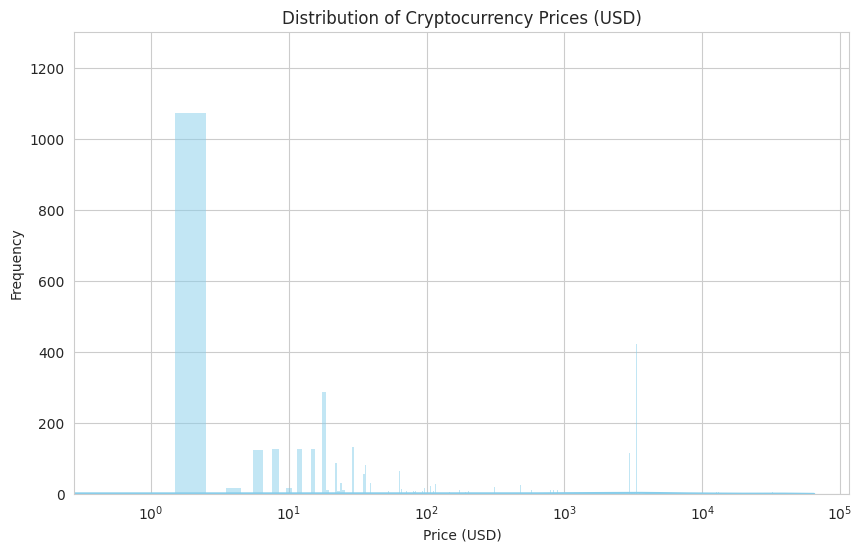


2️⃣ Histogram for vol_24h:
 - Purpose: Analyze the distribution of 24-hour trading volumes to identify highly traded cryptocurrencies.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


 - Note: Log scale applied due to significant volume differences (e.g., USDT ~$130B vs. LEOu ~$556K).


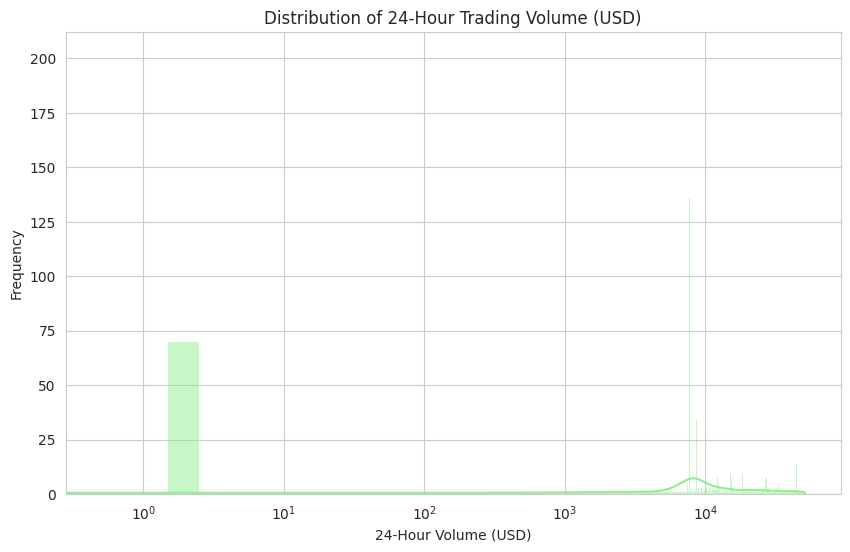


6️⃣ Histogram for market_cap:
 - Purpose: Visualize the distribution of market capitalization to identify dominant cryptocurrencies.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


 - Note: Log scale applied due to vast differences (e.g., BTC ~$2.23T vs. LEOu ~$8.77B).


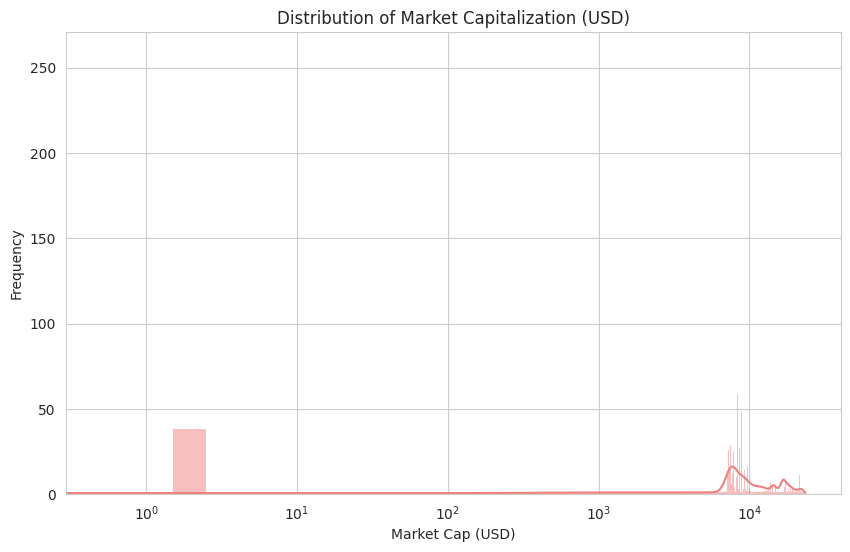


✅ Histograms complete! These visualizations reveal the spread and shape of key metrics, aiding in understanding market dynamics. 🚀


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Set up the plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Introduction to Histograms
print("📊 Generating Histograms for Cryptocurrency Dataset 📈")
print("\nObjective: Visualize the distributions of key numerical columns to understand their spread, central tendency, and variability. Each histogram includes a Kernel Density Estimation (KDE) curve to provide a smoothed estimate of the distribution. 🧮")
print("\nColumns Analyzed:")
print("- price_usd: Price of each cryptocurrency in USD 💵")
print("- vol_24h: 24-hour trading volume in USD 📉")
print("- total_vol: Percentage of total trading volume 📊")
print("- chg_24h: 24-hour price change (as a decimal) 📈")
print("- chg_7d: 7-day price change (as a decimal) 📅")
print("- market_cap: Market capitalization in USD 🌐")

# Step 1: Histogram for price_usd
print("\n1️⃣ Histogram for price_usd:")
print(" - Purpose: Understand the distribution of cryptocurrency prices. Prices vary widely due to the diversity of coins (e.g., Bitcoin vs. stablecoins like USDT).")
plt.figure()
sns.histplot(data=df, x='price_usd', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Cryptocurrency Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale due to wide range of prices
print(" - Note: Log scale applied due to extreme price range (e.g., BTC ~$112,000 vs. DOGE ~$0.24).")
plt.show()

# Step 2: Histogram for vol_24h
print("\n2️⃣ Histogram for vol_24h:")
print(" - Purpose: Analyze the distribution of 24-hour trading volumes to identify highly traded cryptocurrencies.")
plt.figure()
sns.histplot(data=df, x='vol_24h', kde=True, color='lightgreen', bins=30)
plt.title('Distribution of 24-Hour Trading Volume (USD)')
plt.xlabel('24-Hour Volume (USD)')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale due to large volume range
print(" - Note: Log scale applied due to significant volume differences (e.g., USDT ~$130B vs. LEOu ~$556K).")
plt.show()

# Step 3: Histogram for market_cap
print("\n6️⃣ Histogram for market_cap:")
print(" - Purpose: Visualize the distribution of market capitalization to identify dominant cryptocurrencies.")
plt.figure()
sns.histplot(data=df, x='market_cap', kde=True, color='lightcoral', bins=30)
plt.title('Distribution of Market Capitalization (USD)')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale due to large market cap range
print(" - Note: Log scale applied due to vast differences (e.g., BTC ~$2.23T vs. LEOu ~$8.77B).")
plt.show()

print("\n✅ Histograms complete! These visualizations reveal the spread and shape of key metrics, aiding in understanding market dynamics. 🚀")

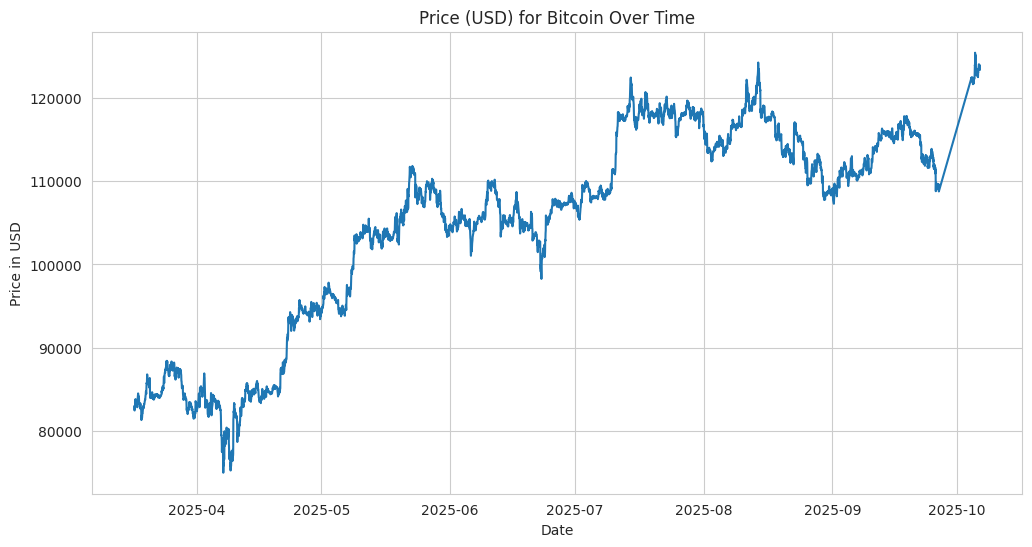

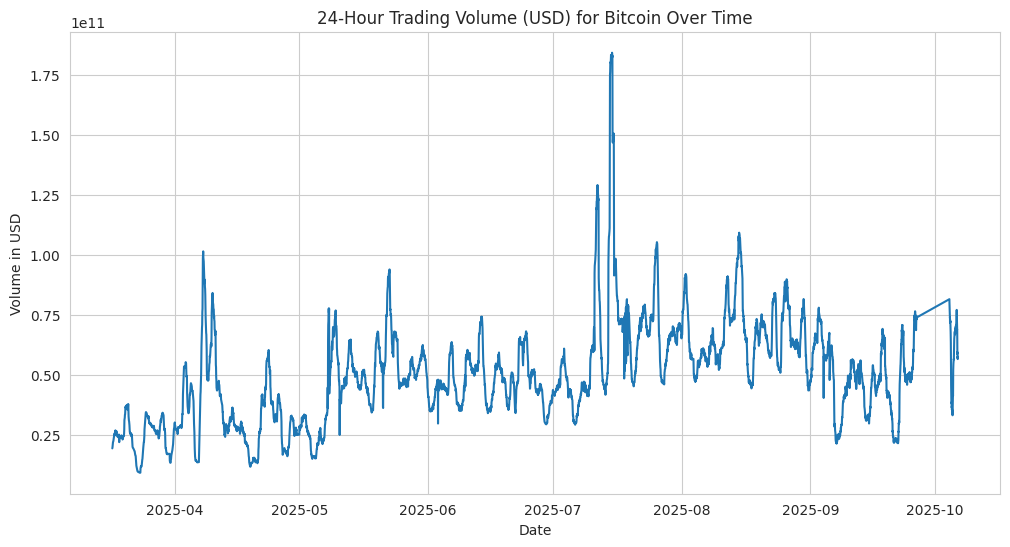

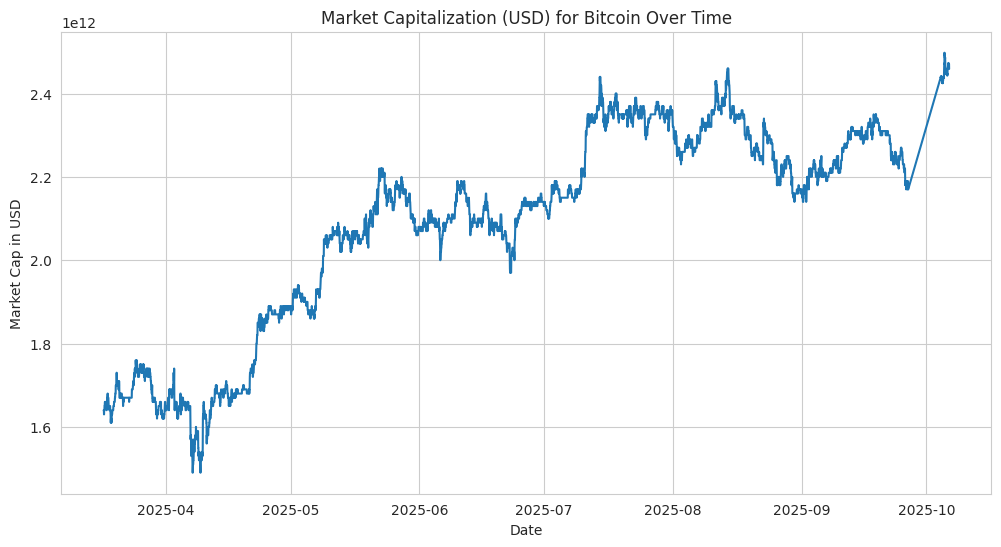

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Filter for Bitcoin as the representative cryptocurrency
df_btc = df[df['name'] == 'Bitcoin'].sort_values('timestamp').dropna()

# Feature engineering for volatility and momentum
df_btc['volatility_7d'] = df_btc['price_usd'].rolling(window=7, min_periods=1).std()
df_btc['momentum_7d'] = df_btc['price_usd'].diff(periods=7)

# List of features to plot
features_to_plot = [
    ('price_usd', 'Price (USD)', 'Price in USD'),
    ('vol_24h', '24-Hour Trading Volume (USD)', 'Volume in USD'),
    ('market_cap', 'Market Capitalization (USD)', 'Market Cap in USD')
]
# Generate lineplots
for column, title, ylabel in features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_btc, x='timestamp', y=column)
    plt.title(f'{title} for Bitcoin Over Time')
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.description = (
        f'This lineplot shows the {title.lower()} for Bitcoin over time, using the timestamp as the x-axis. '
        f'The y-axis represents the {ylabel.lower()}, providing insights into Bitcoin\'s market behavior. '
        f'For price, volume, and market cap, the plot reveals trends and fluctuations critical for trading and investment decisions. '
        f'This visualization helps traders and analysts understand temporal patterns in Bitcoin\'s financial metrics.'
    )
    plt.show()

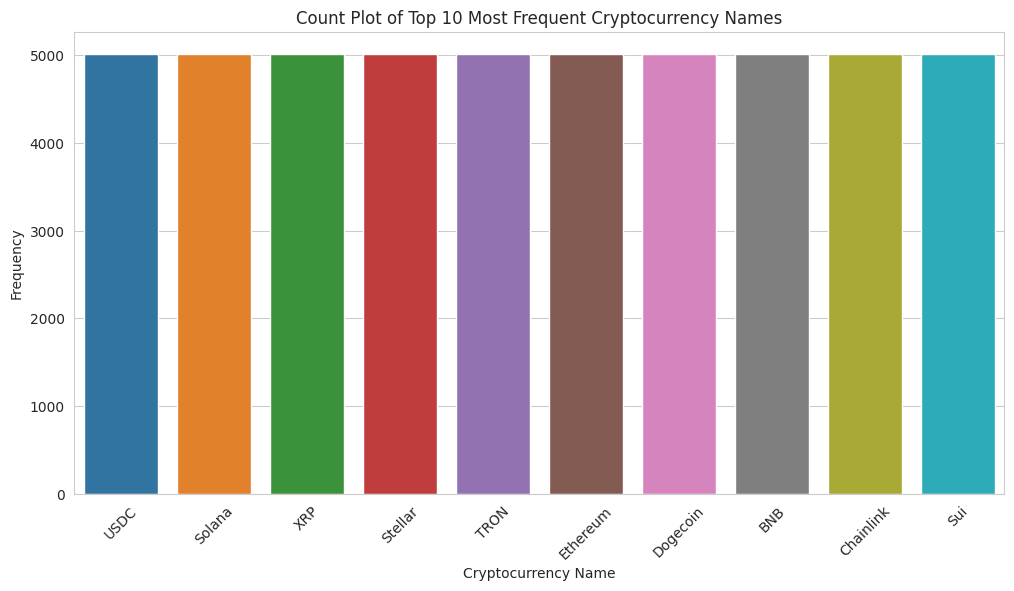

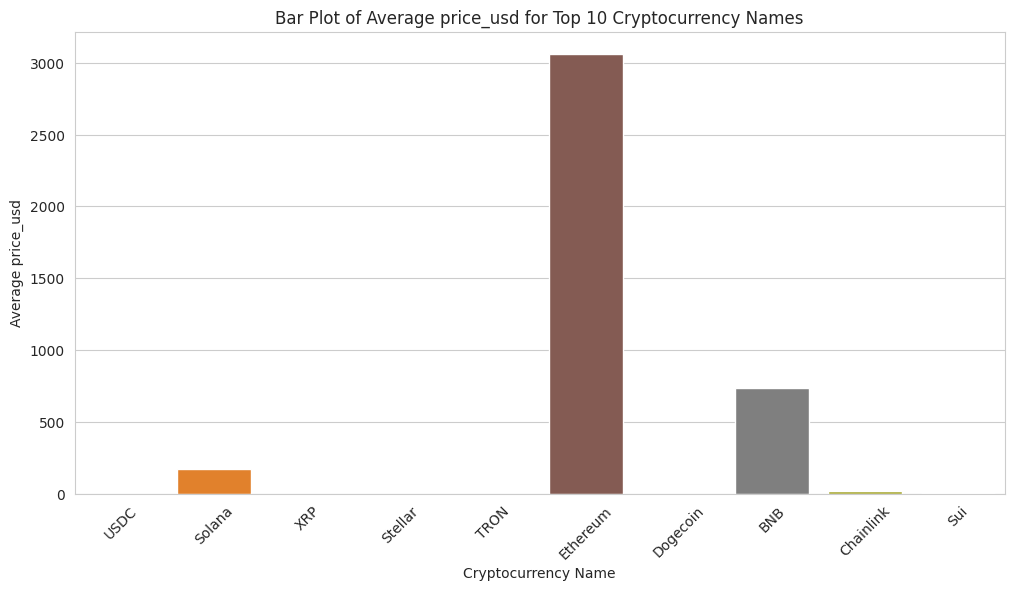

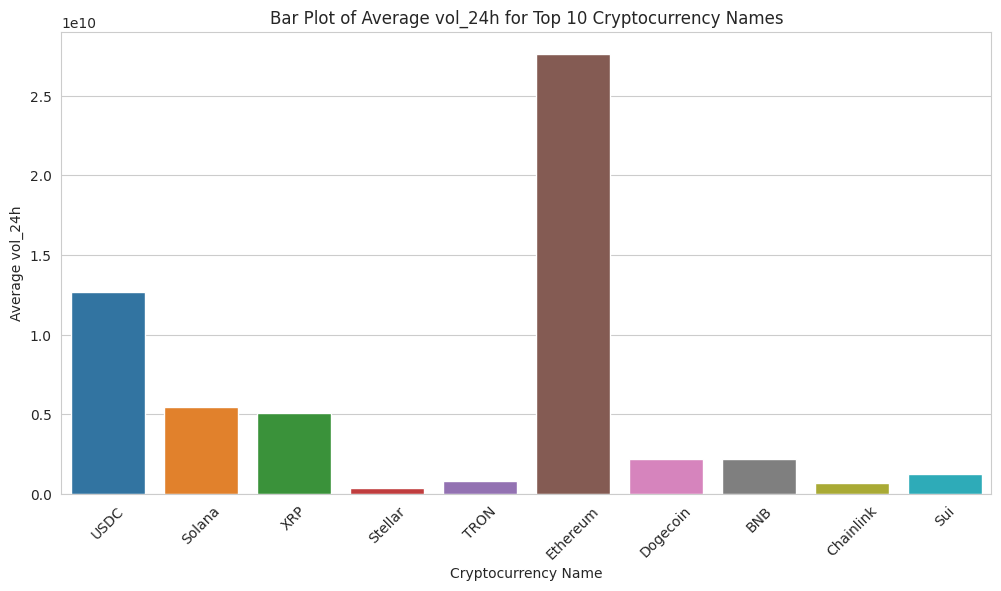

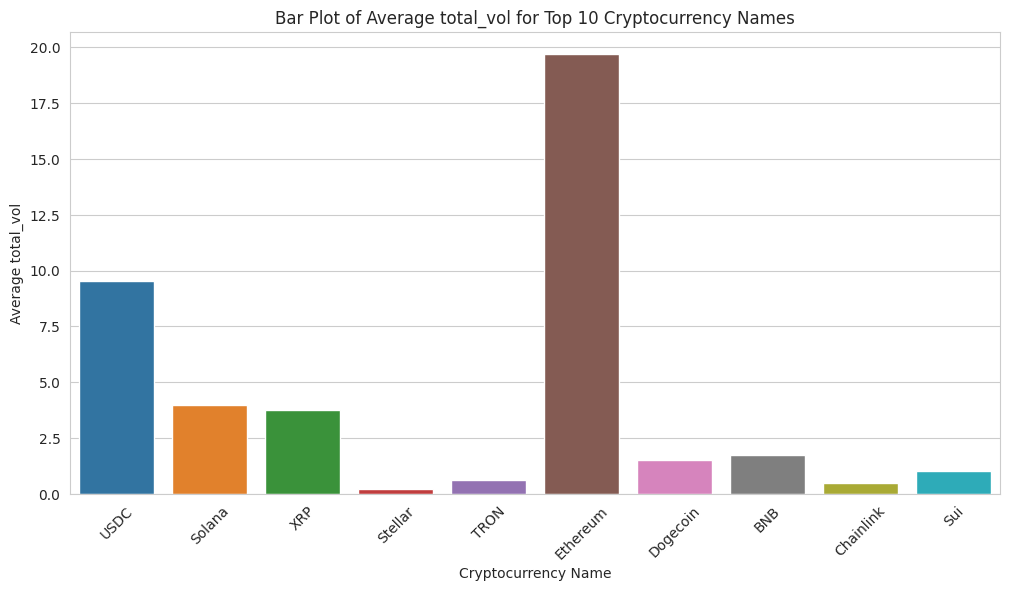

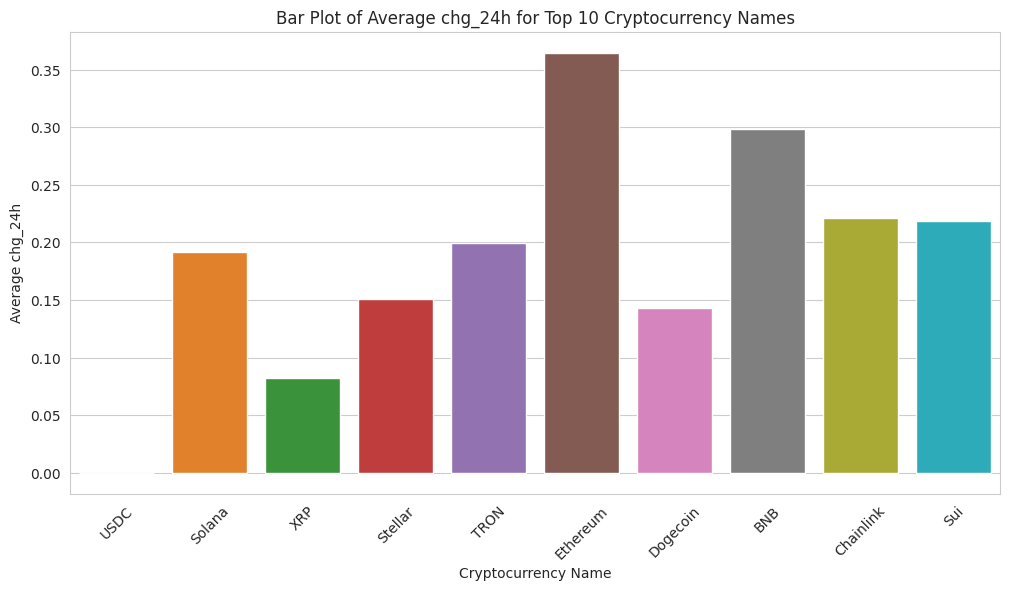

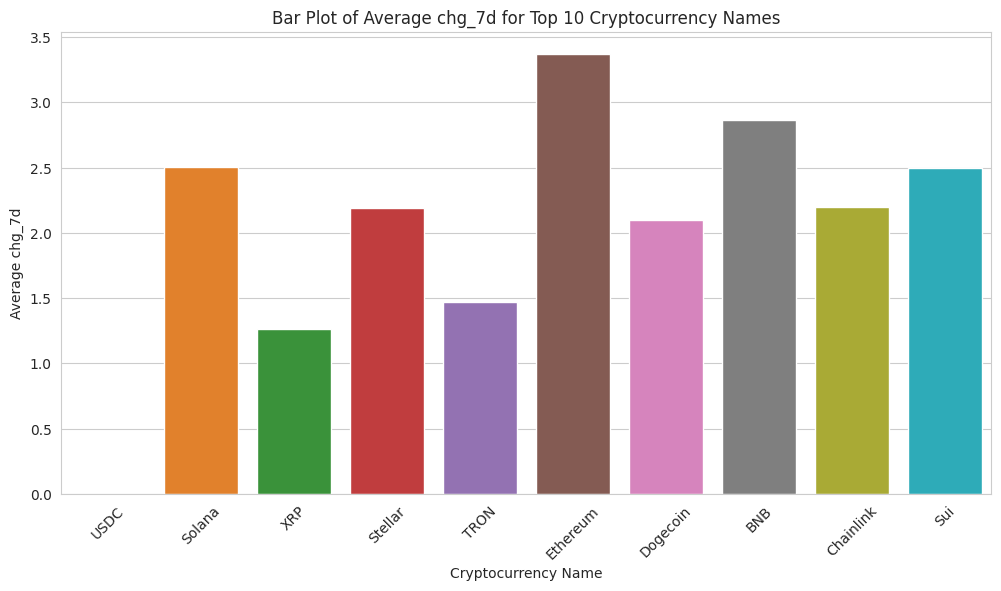

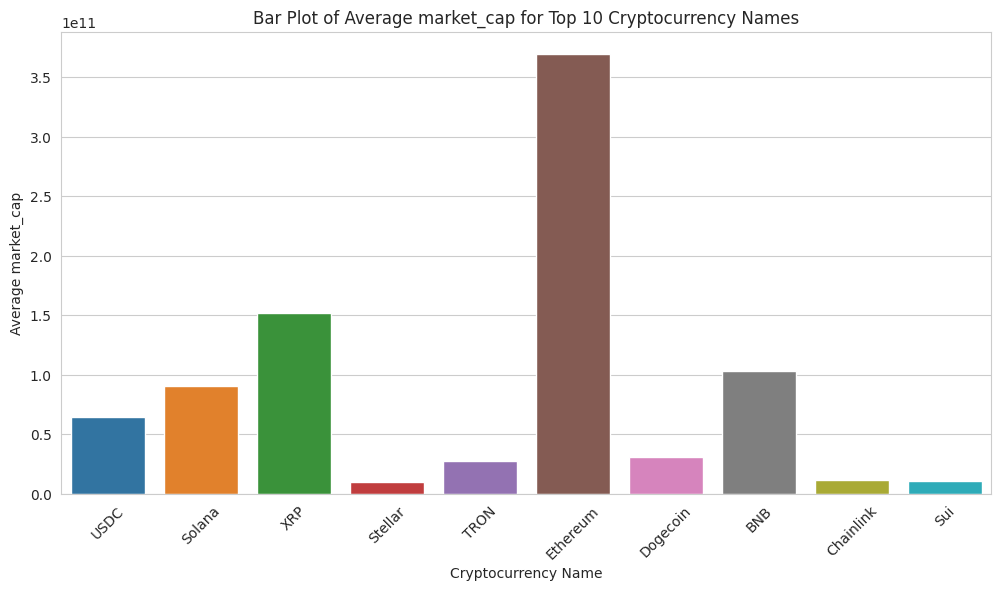

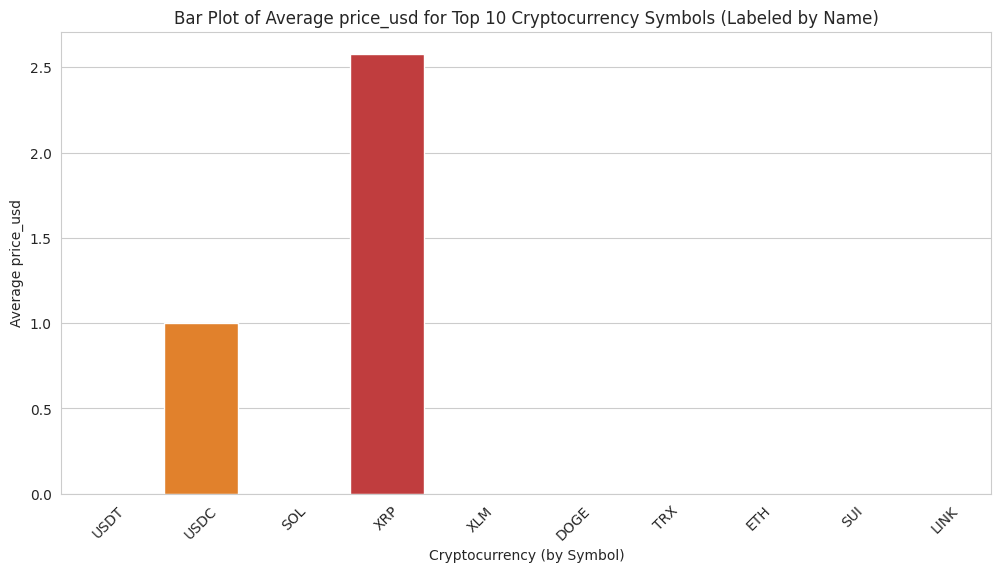

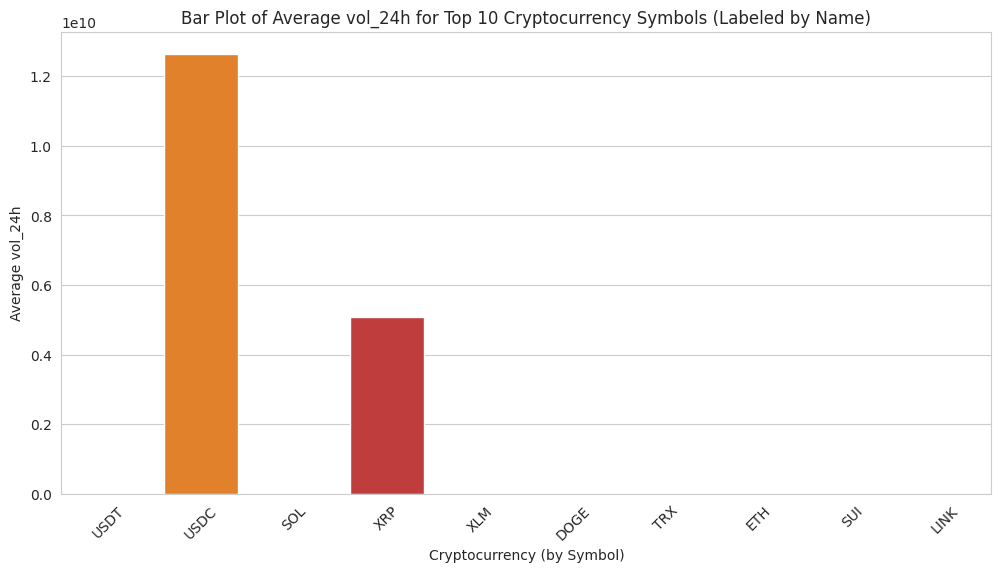

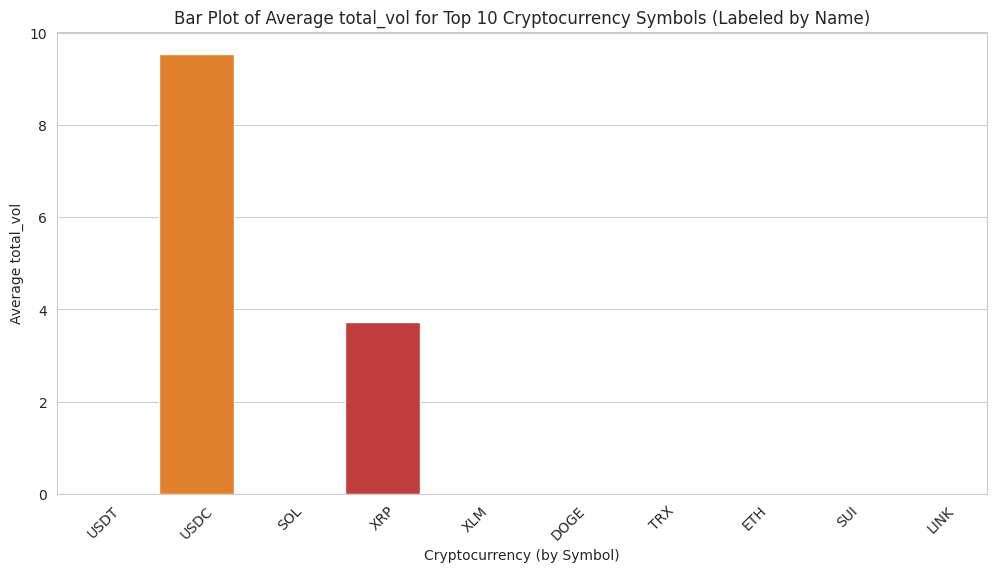

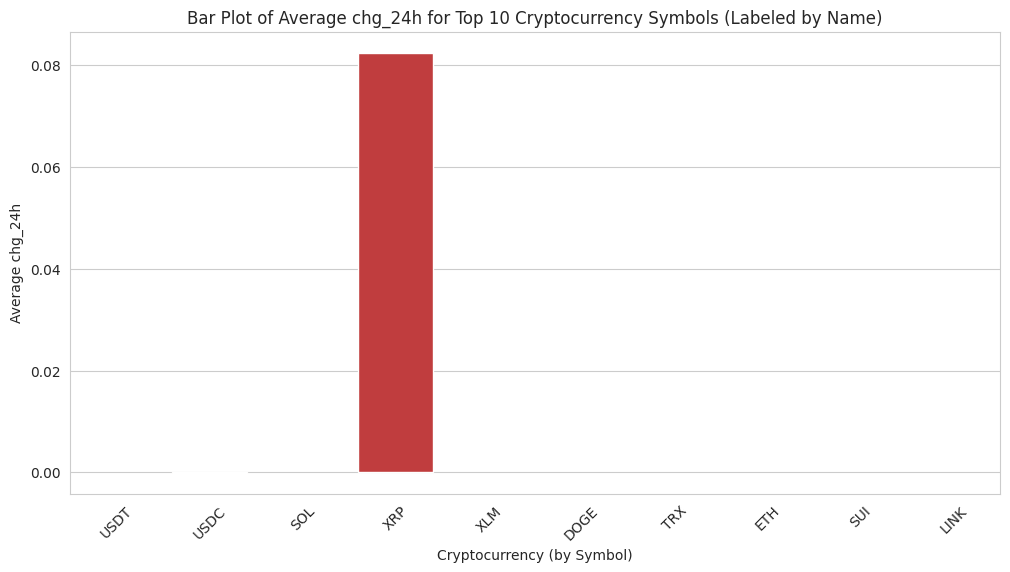

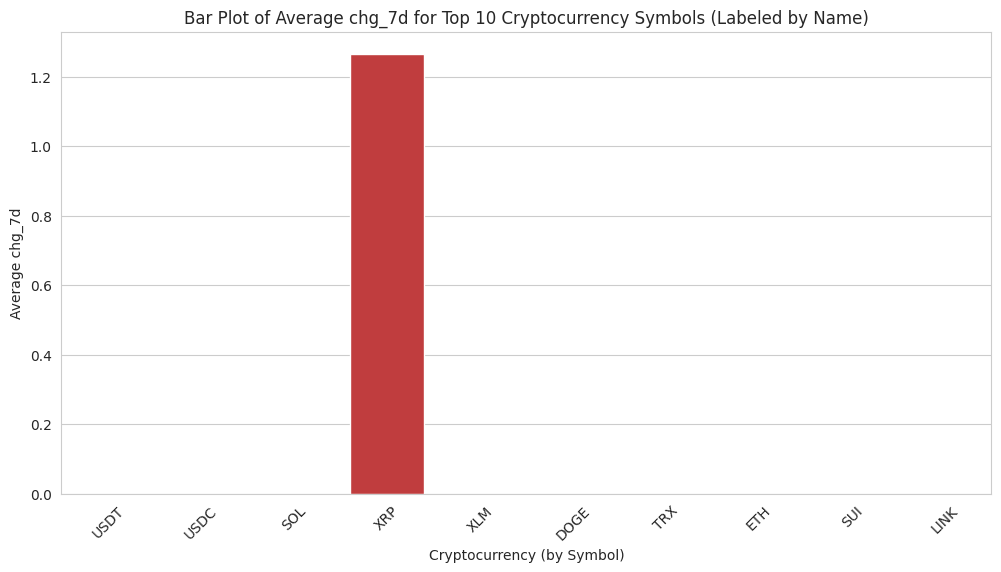

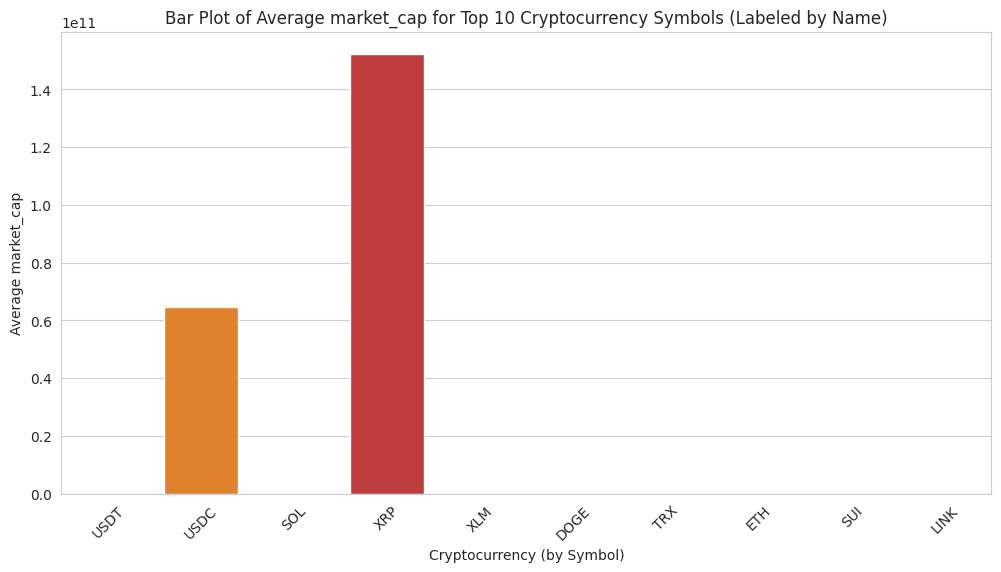

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Assuming the data is in a file named 'cryptocurrency.csv'
# If data is in string, you can use: data = pd.read_csv(io.StringIO(document_content))
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Numerical columns
numerical_cols = ['price_usd', 'vol_24h', 'total_vol', 'chg_24h', 'chg_7d', 'market_cap']

# Categorical columns: name, symbol (timestamp is datetime, not categorical for barplots)

# Get top 10 names by frequency
top_10_names = df['name'].value_counts().head(10).index

# Countplot for top 10 names
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['name'].isin(top_10_names)], x='name', order=top_10_names)
plt.title('Count Plot of Top 10 Most Frequent Cryptocurrency Names')
plt.xlabel('Cryptocurrency Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.description = 'This count plot shows the top 10 cryptocurrency names by their frequency of appearance in the dataset, indicating how often each was recorded over time.'
plt.show()

# For barplots: Group by name, compute mean for numericals, then plot for top 10 names against each numerical
grouped = df.groupby('name')[numerical_cols].mean().reset_index()

# Filter to top 10 names
top_grouped = grouped[grouped['name'].isin(top_10_names)]

# For each numerical column, create a barplot
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_grouped, x='name', y=col, order=top_10_names)
    plt.title(f'Bar Plot of Average {col} for Top 10 Cryptocurrency Names')
    plt.xlabel('Cryptocurrency Name')
    plt.ylabel(f'Average {col}')
    plt.xticks(rotation=45)
    plt.description = f'This bar plot displays the average value of {col} for the top 10 most frequent cryptocurrency names in the dataset. It helps compare the typical {col} across these popular cryptocurrencies.'
    plt.show()

# Similarly for symbol (though symbols are likely unique to names, but for completeness)
top_10_symbols = df['symbol'].value_counts().head(10).index
top_grouped_symbols = grouped[grouped['name'].isin(df[df['symbol'].isin(top_10_symbols)]['name'].unique())]  # Map back to names if needed

for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_grouped_symbols, x='name', y=col, order=top_10_symbols)  # Using name for labels, but order by symbol freq
    plt.title(f'Bar Plot of Average {col} for Top 10 Cryptocurrency Symbols (Labeled by Name)')
    plt.xlabel('Cryptocurrency (by Symbol)')
    plt.ylabel(f'Average {col}')
    plt.xticks(rotation=45)
    plt.description = f'This bar plot displays the average value of {col} for cryptocurrencies corresponding to the top 10 most frequent symbols in the dataset.'
    plt.show()

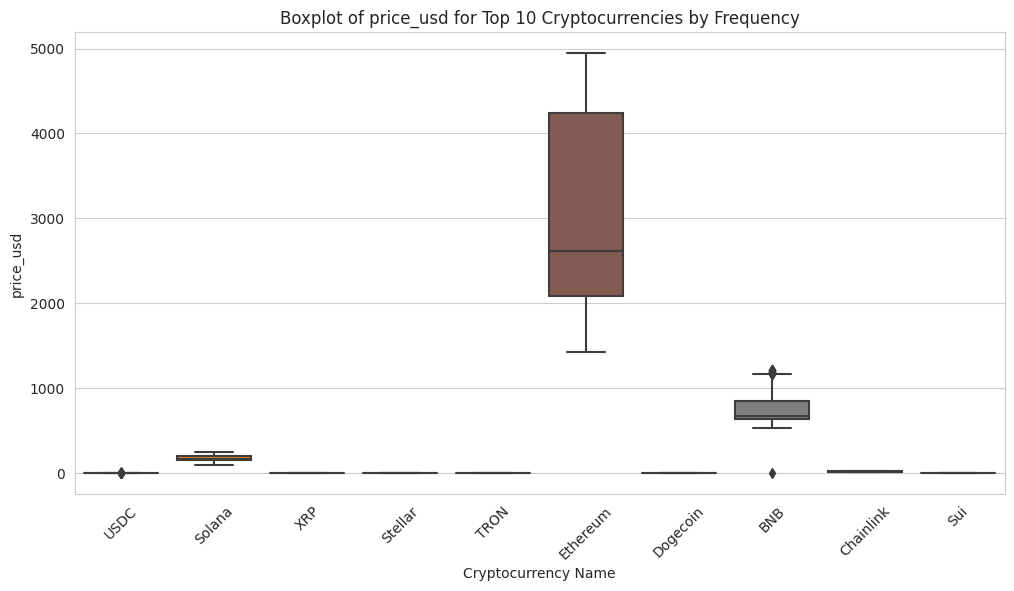

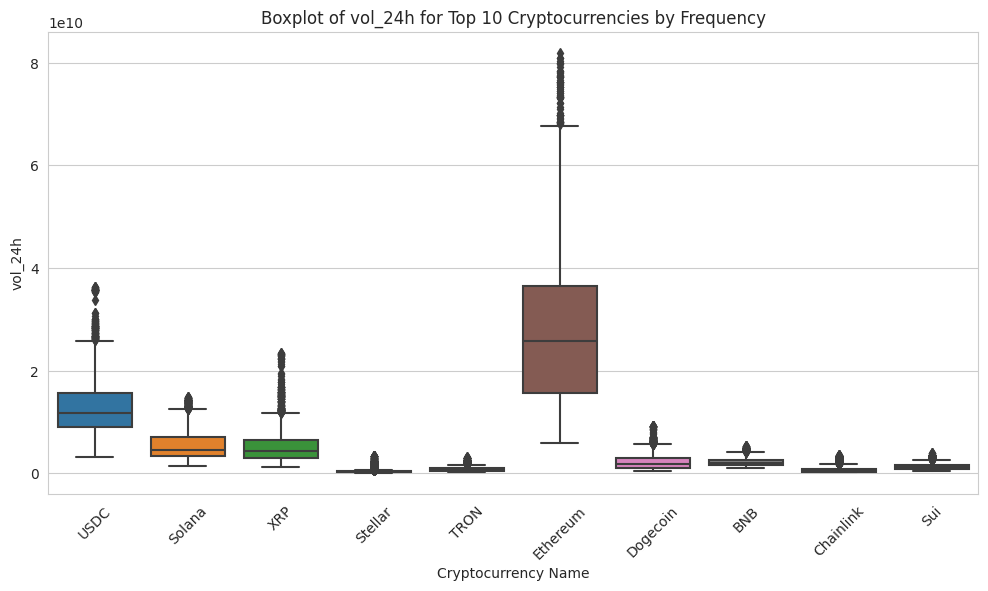

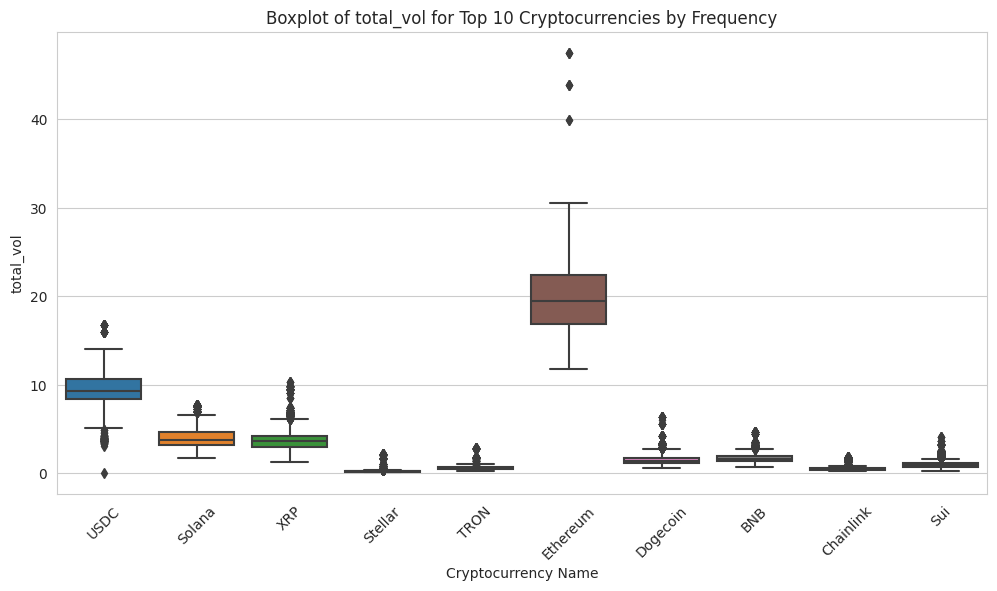

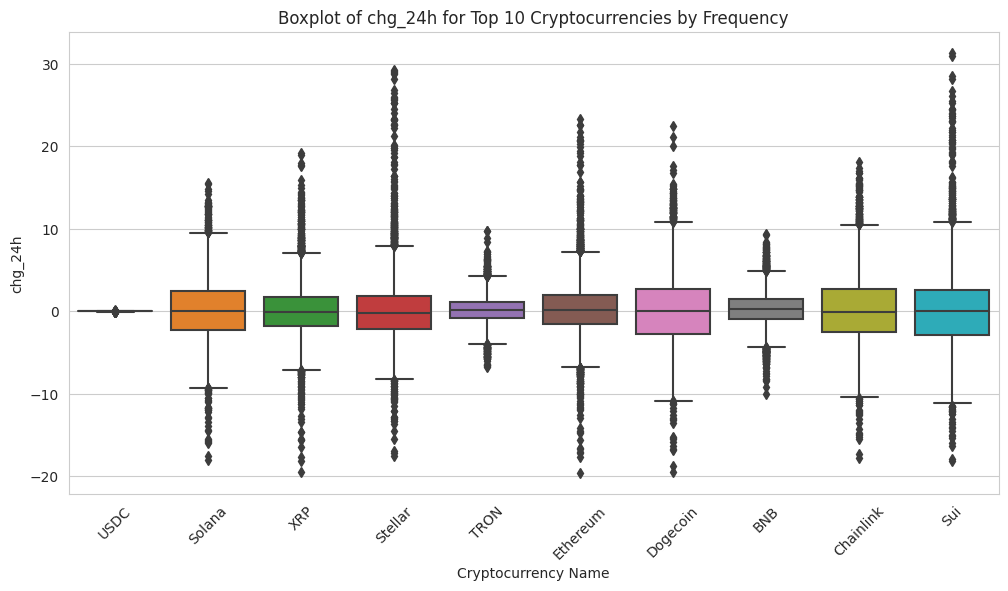

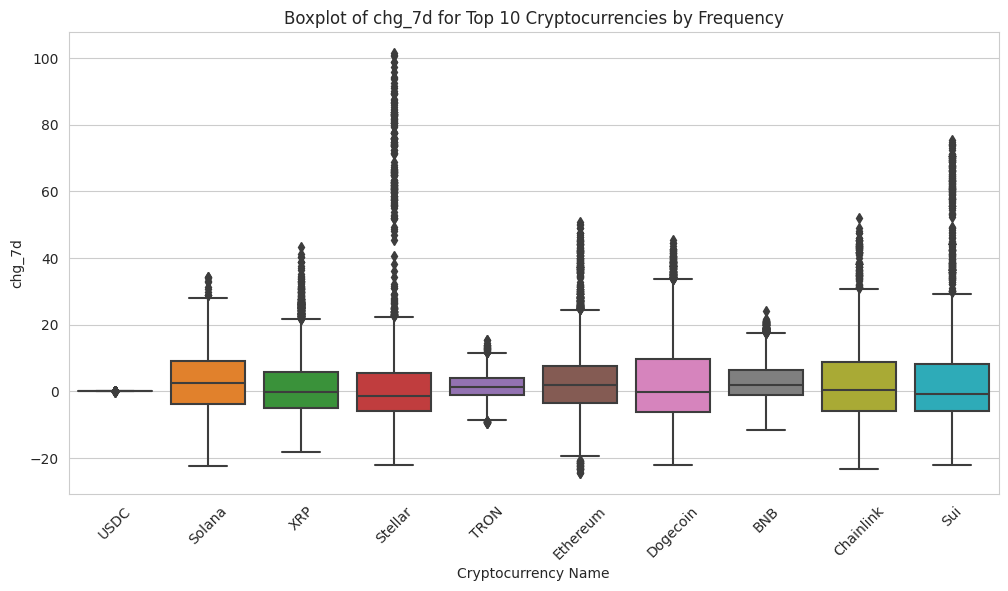

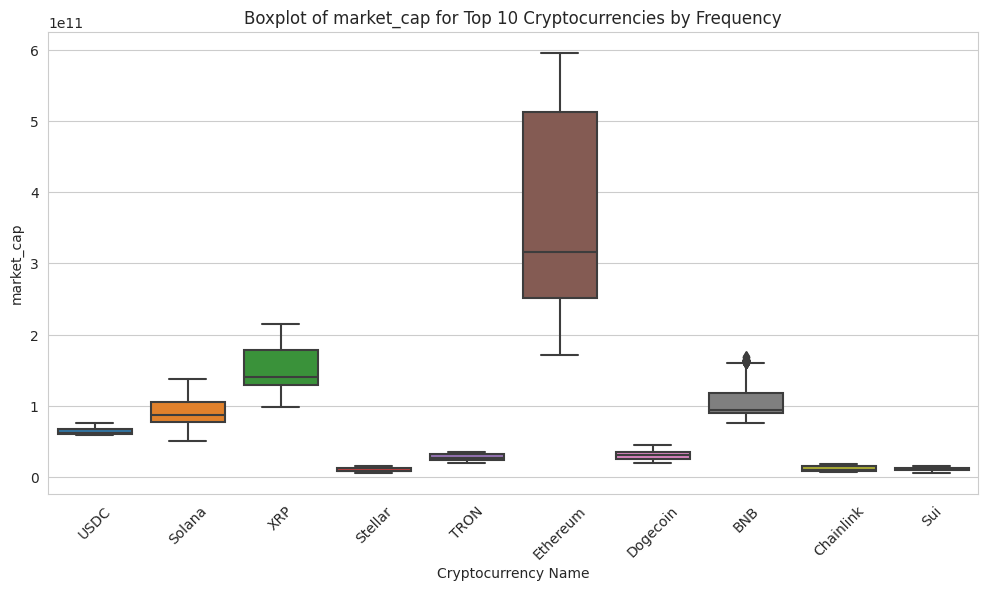

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Numerical columns for boxplots
numerical_cols = ['price_usd', 'vol_24h', 'total_vol', 'chg_24h', 'chg_7d', 'market_cap']

# Get top 10 cryptocurrencies by frequency for meaningful grouping
top_10_names = df['name'].value_counts().head(10).index
df_top_10 = df[df['name'].isin(top_10_names)]

# Create boxplots for each numerical column against the top 10 cryptocurrencies
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='name', y=col, data=df_top_10, order=top_10_names)
    plt.title(f'Boxplot of {col} for Top 10 Cryptocurrencies by Frequency')
    plt.xlabel('Cryptocurrency Name')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.description = (f'This boxplot illustrates the distribution of {col} for the top 10 most frequently recorded cryptocurrencies in the dataset. '
                      f'The box shows the interquartile range (IQR), the line inside represents the median, whiskers extend to the minimum and maximum values within 1.5*IQR, '
                      f'and outliers are plotted as individual points. This visualization highlights the variability and central tendency of {col} for each cryptocurrency.')
    plt.show()

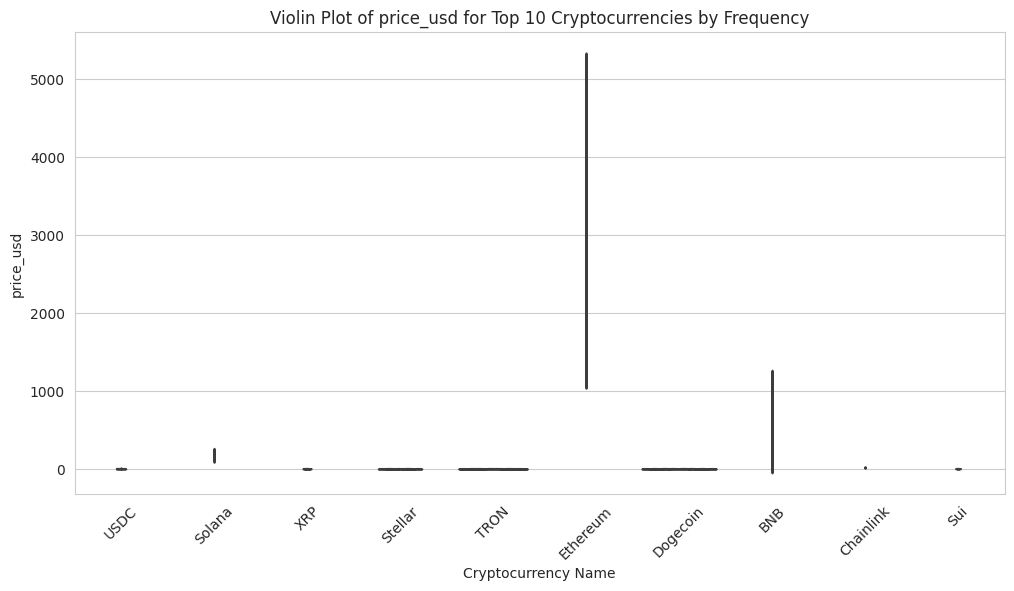

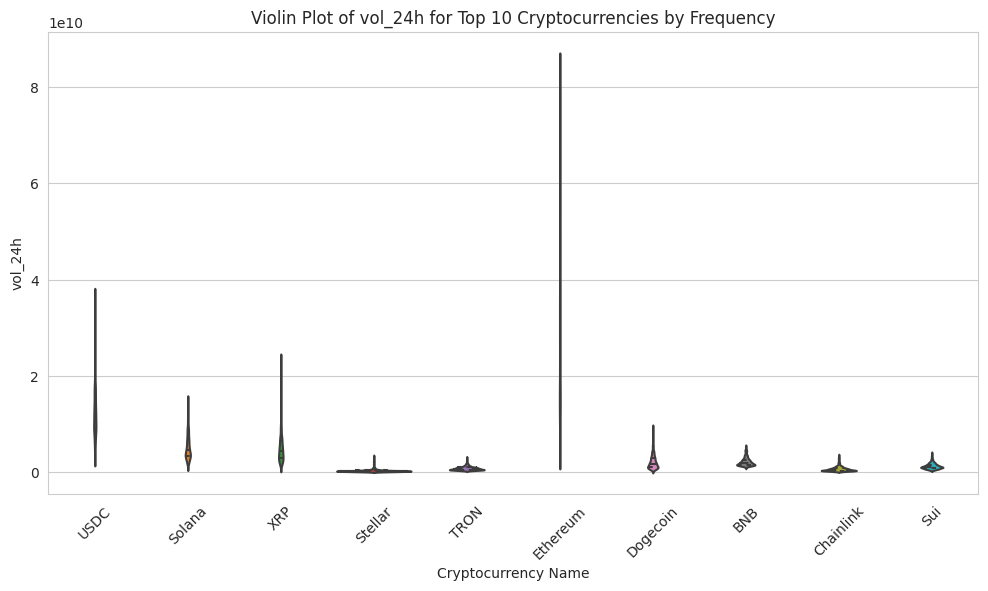

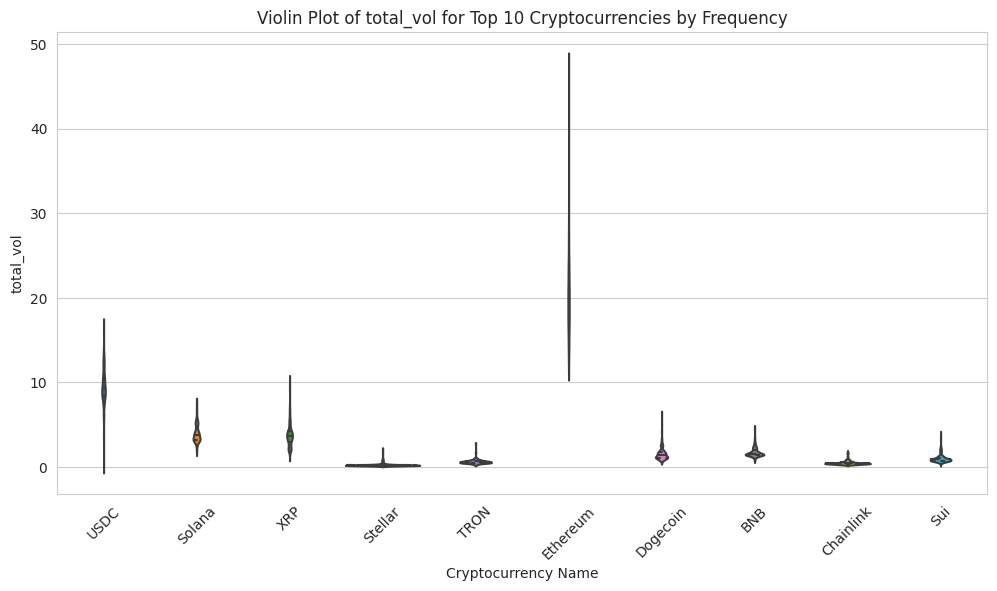

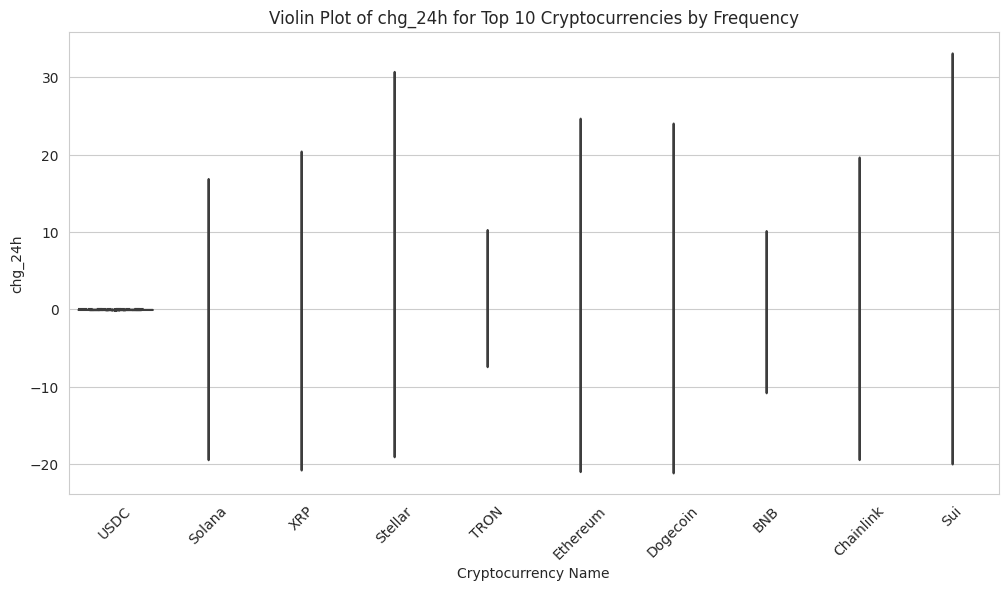

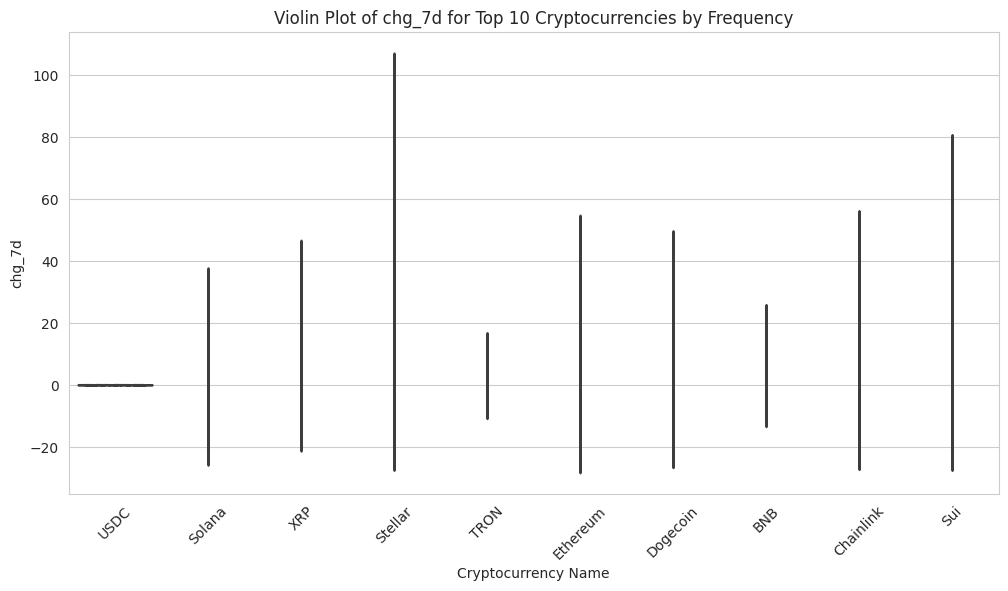

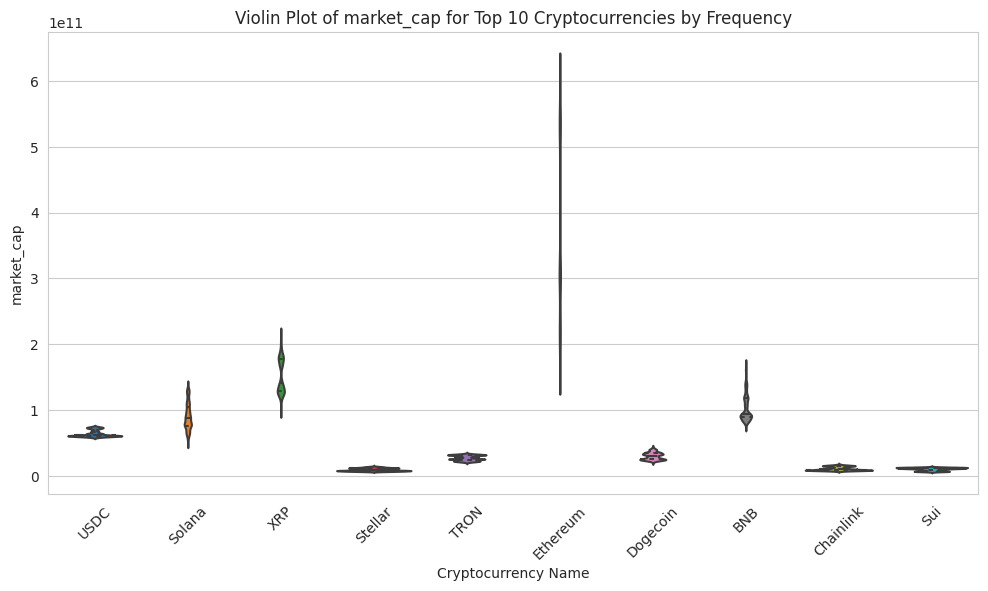

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Numerical columns for violin plots
numerical_cols = ['price_usd', 'vol_24h', 'total_vol', 'chg_24h', 'chg_7d', 'market_cap']

# Get top 10 cryptocurrencies by frequency for meaningful grouping
top_10_names = df['name'].value_counts().head(10).index
df_top_10 = df[df['name'].isin(top_10_names)]

# Create violin plots for each numerical column against the top 10 cryptocurrencies
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='name', y=col, data=df_top_10, order=top_10_names, inner='quartile')
    plt.title(f'Violin Plot of {col} for Top 10 Cryptocurrencies by Frequency')
    plt.xlabel('Cryptocurrency Name')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.description = (
        f'This violin plot illustrates the distribution of {col} for the top 10 most frequently recorded cryptocurrencies in the dataset. '
        f'The width of the violin represents the density of data points at different values, with wider areas indicating higher density. '
        f'The inner quartiles (shown as lines) mark the 25th, 50th (median), and 75th percentiles. '
        f'This visualization highlights the spread, density, and central tendency of {col} for each cryptocurrency, providing insights into variability and distribution shape.'
    )
    plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


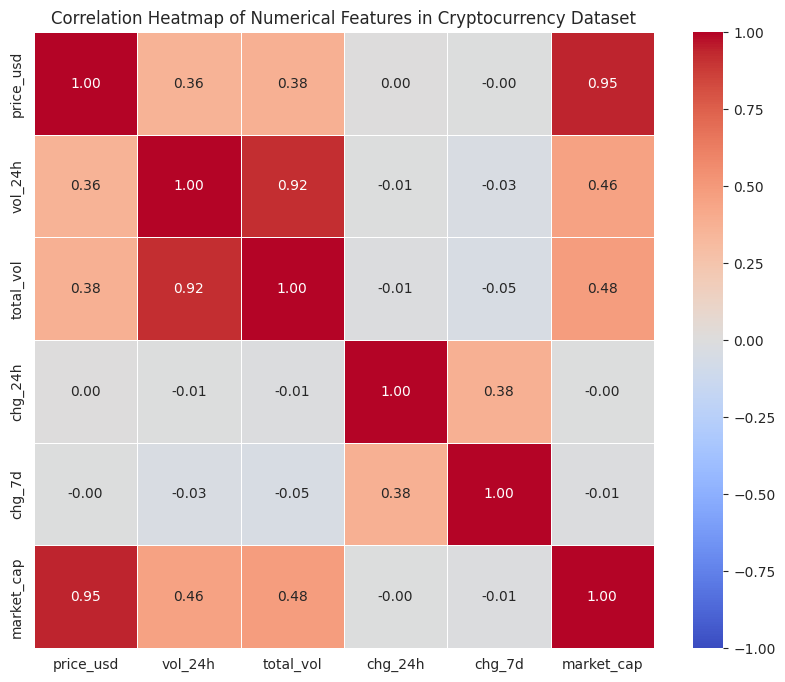

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the numerical columns
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Select numerical columns for correlation analysis
numerical_cols = ['price_usd', 'vol_24h', 'total_vol', 'chg_24h', 'chg_7d', 'market_cap']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features in Cryptocurrency Dataset')
plt.description = (
    'This correlation heatmap visualizes the Pearson correlation coefficients between numerical features in the cryptocurrency dataset, '
    'including price_usd, vol_24h, total_vol, chg_24h, chg_7d, and market_cap. '
    'The color intensity represents the strength of the correlation: red indicates positive correlations (closer to 1), '
    'blue indicates negative correlations (closer to -1), and values near 0 indicate weak or no correlation. '
    'Annotations show the exact correlation values, rounded to two decimal places. '
    'This visualization helps identify relationships between variables, such as how price movements or trading volumes relate to market capitalization.'
)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

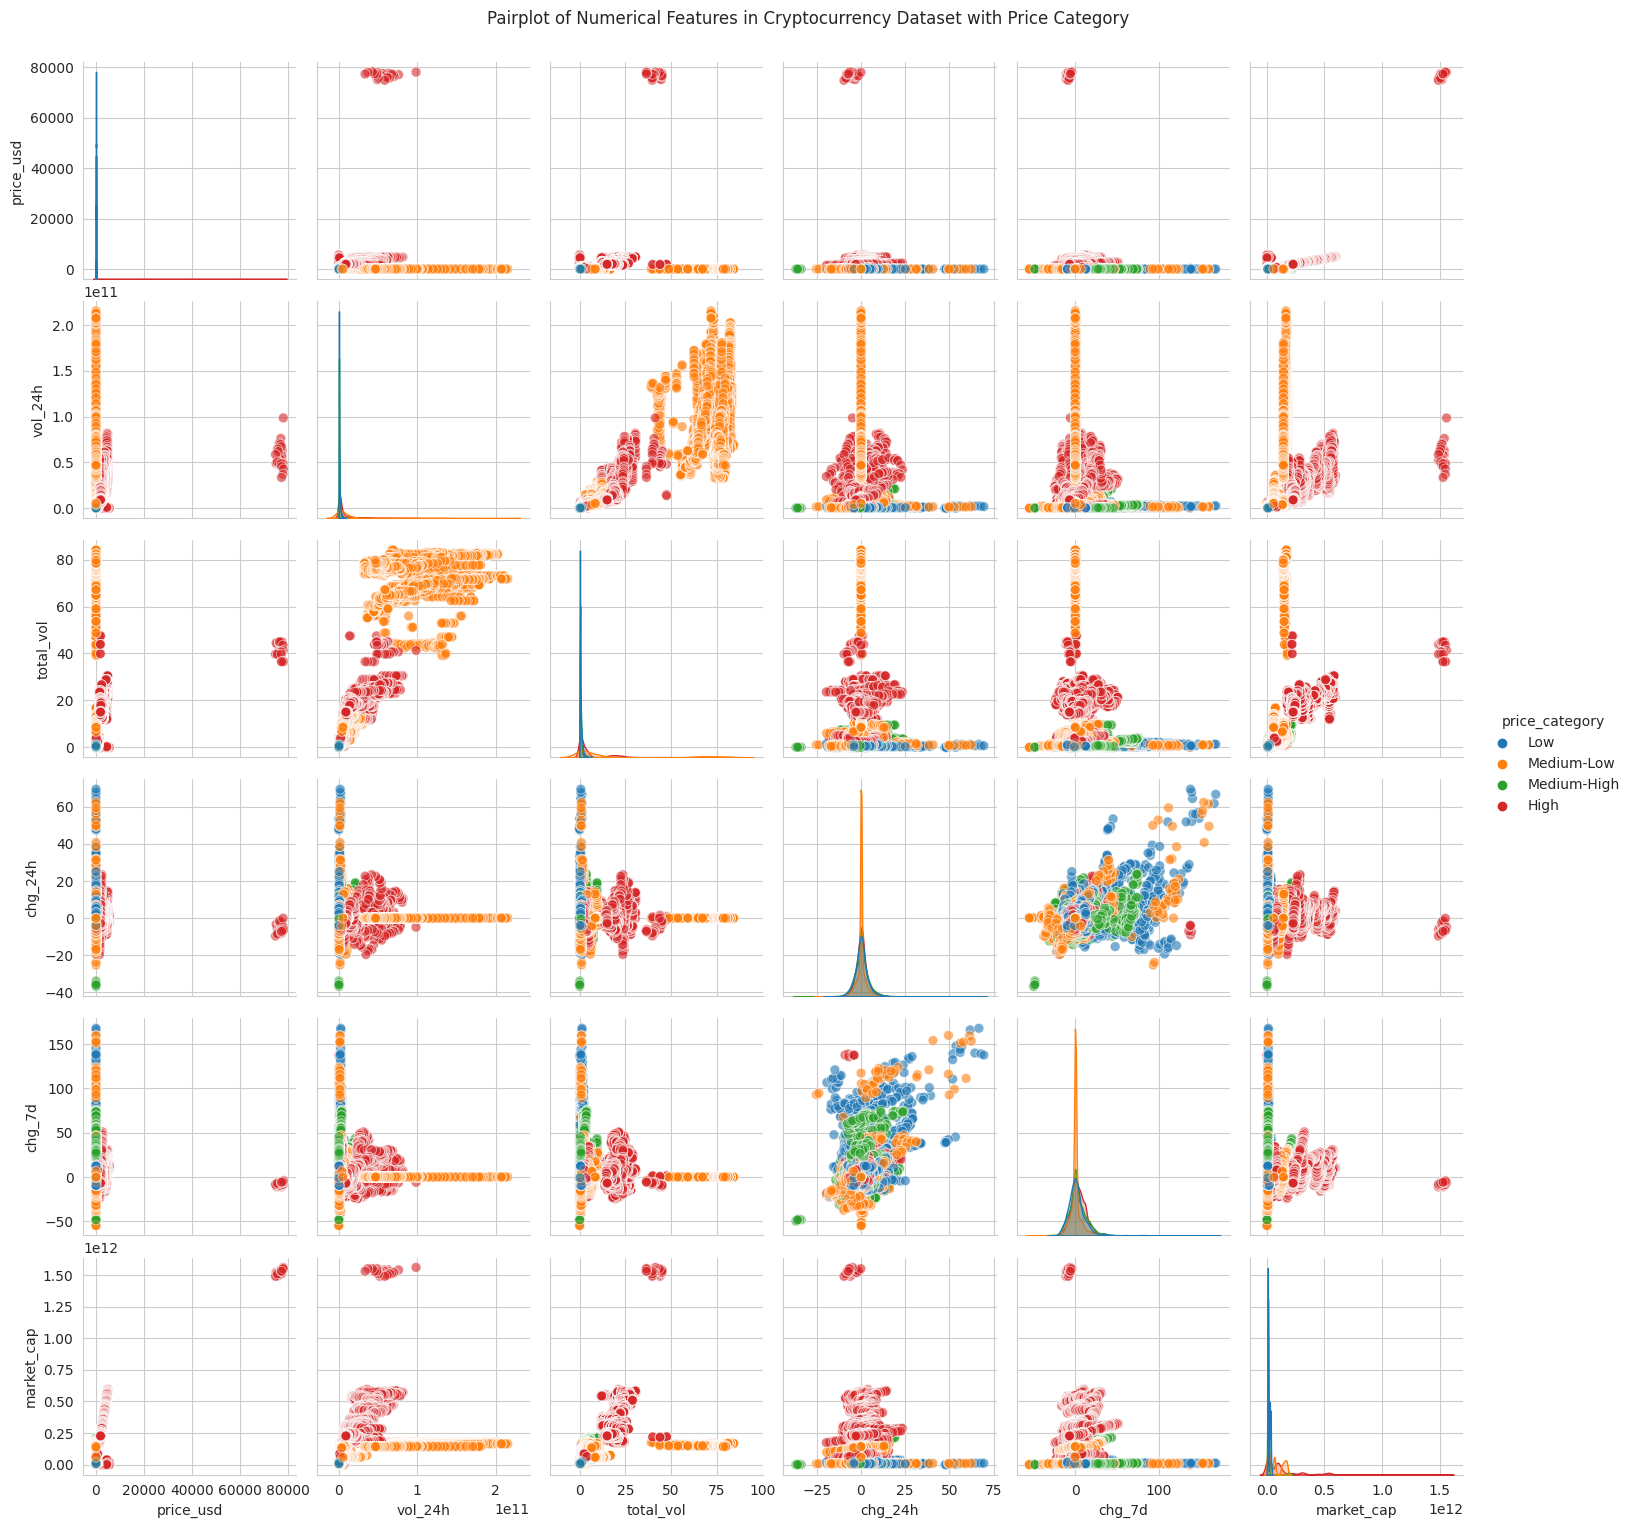

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the numerical columns
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Select numerical columns for pairplot
numerical_cols = ['price_usd', 'vol_24h', 'total_vol', 'chg_24h', 'chg_7d', 'market_cap']

# Select target column (using 'price_usd' as the target for hue to analyze relationships relative to price)
target_col = 'price_usd'

# Filter out extreme values in price_usd to make the plot more readable (optional, based on data distribution)
# Using a reasonable quantile to avoid outliers skewing the visualization
df_filtered = df[numerical_cols].dropna()
df_filtered = df_filtered[df_filtered['price_usd'] < df_filtered['price_usd'].quantile(0.95)]

# Add a categorical column for hue by discretizing price_usd into quartiles
df_filtered['price_category'] = pd.qcut(df_filtered['price_usd'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create pairplot with price_usd as the target (used for hue)
g = sns.pairplot(
    df_filtered,
    vars=numerical_cols,
    hue='price_category',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 50},
    diag_kws={'common_norm': False}
)
g.fig.suptitle('Pairplot of Numerical Features in Cryptocurrency Dataset with Price Category', y=1.02)
g.fig.description = (
    'This pairplot visualizes pairwise relationships between numerical features (price_usd, vol_24h, total_vol, chg_24h, chg_7d, market_cap) '
    'in the cryptocurrency dataset, with data points colored by price_usd quartiles (Low, Medium-Low, Medium-High, High). '
    'The diagonal shows kernel density estimates (KDE) for each feature, illustrating their distribution within each price category. '
    'Off-diagonal scatter plots display bivariate relationships, helping to identify patterns, correlations, or clusters. '
    'The transparency (alpha=0.6) and point size (s=50) enhance readability, and extreme outliers in price_usd are filtered (top 5%) to improve visualization clarity. '
    'This plot is useful for exploring how features like trading volume or market cap relate to price levels and each other.'
)
plt.show()

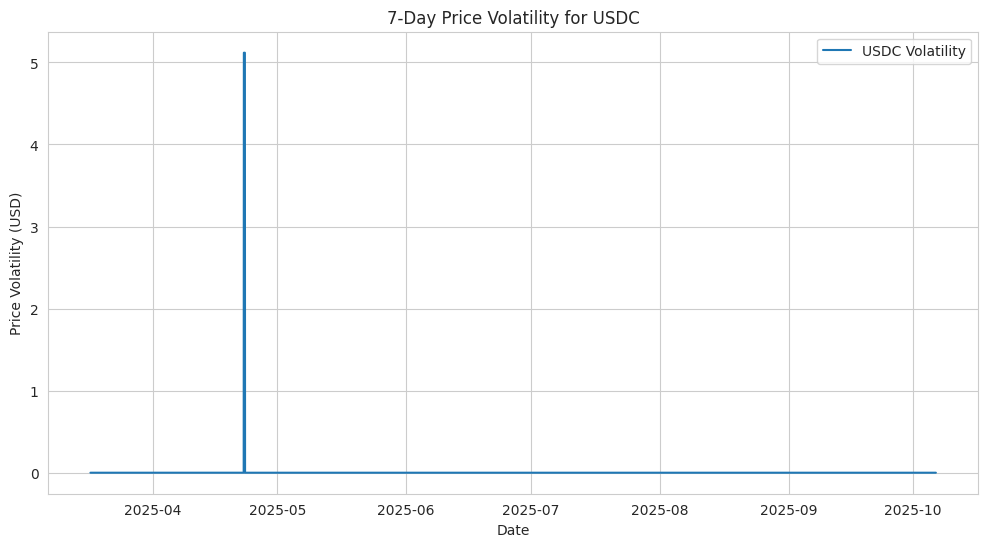

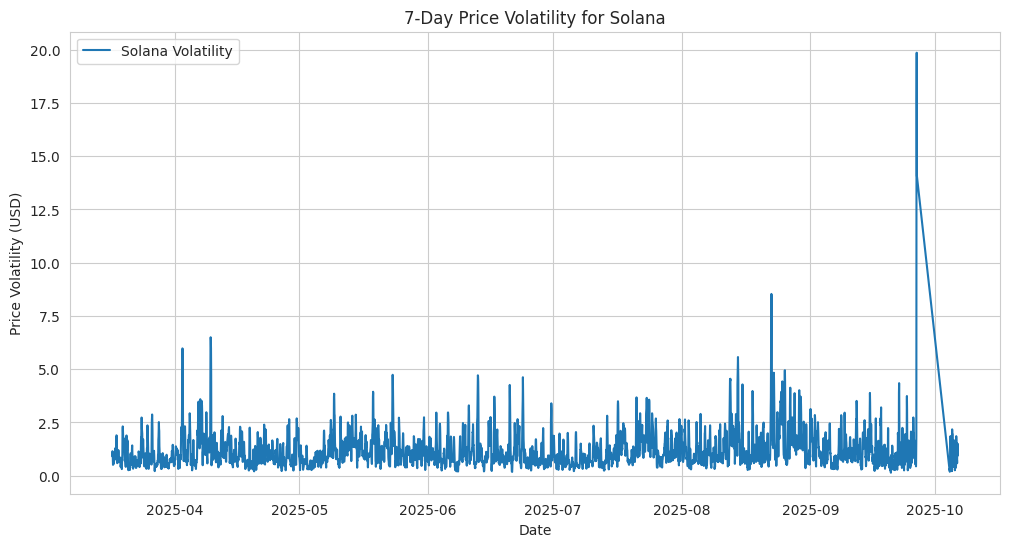

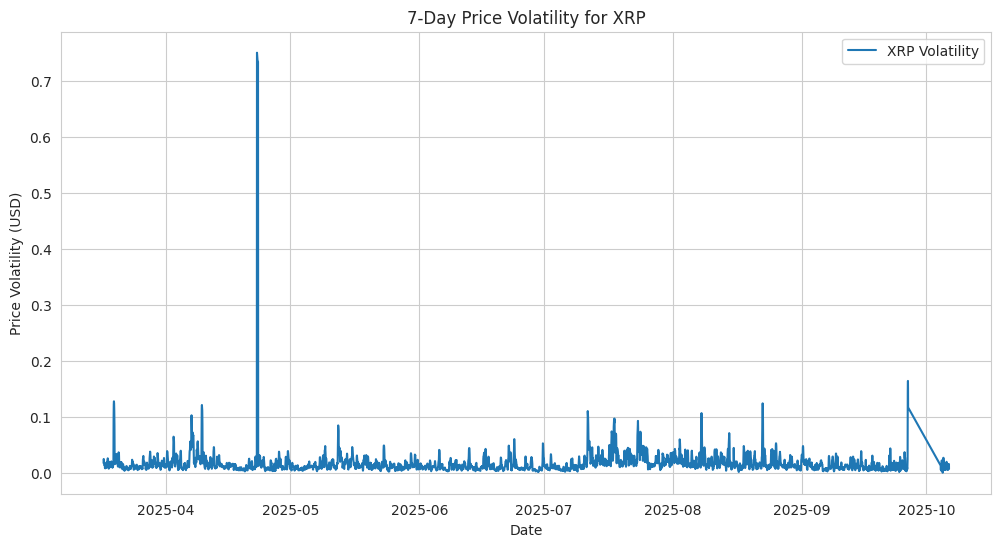

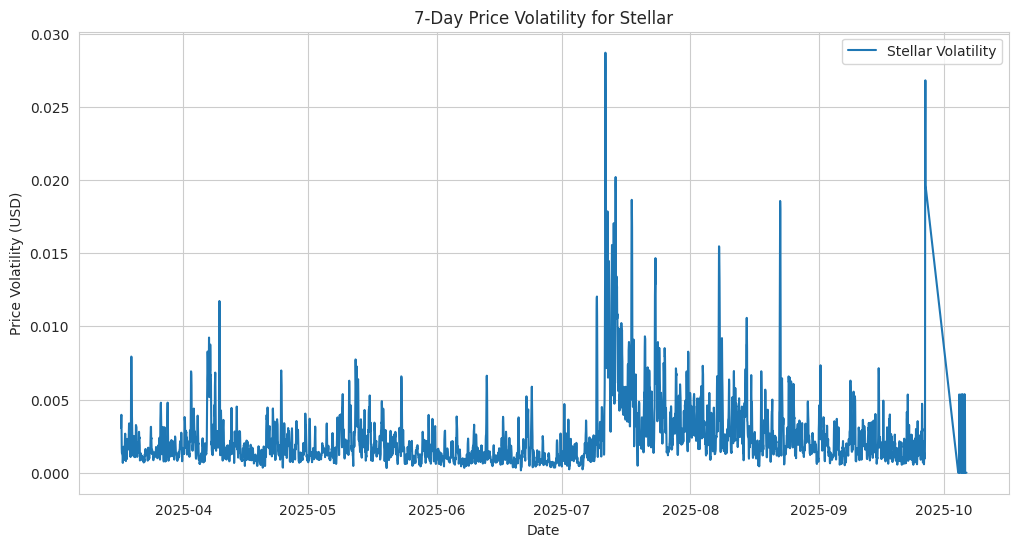

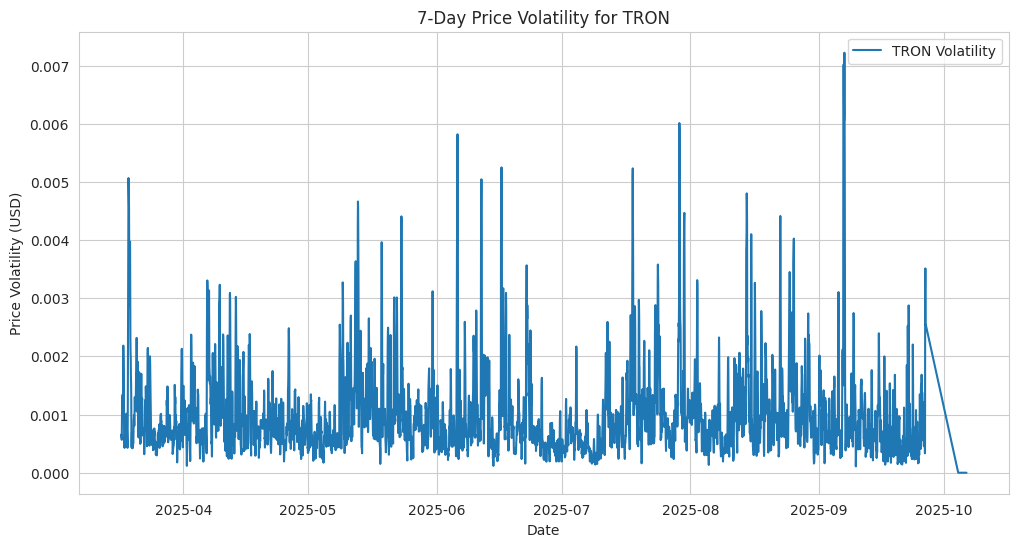

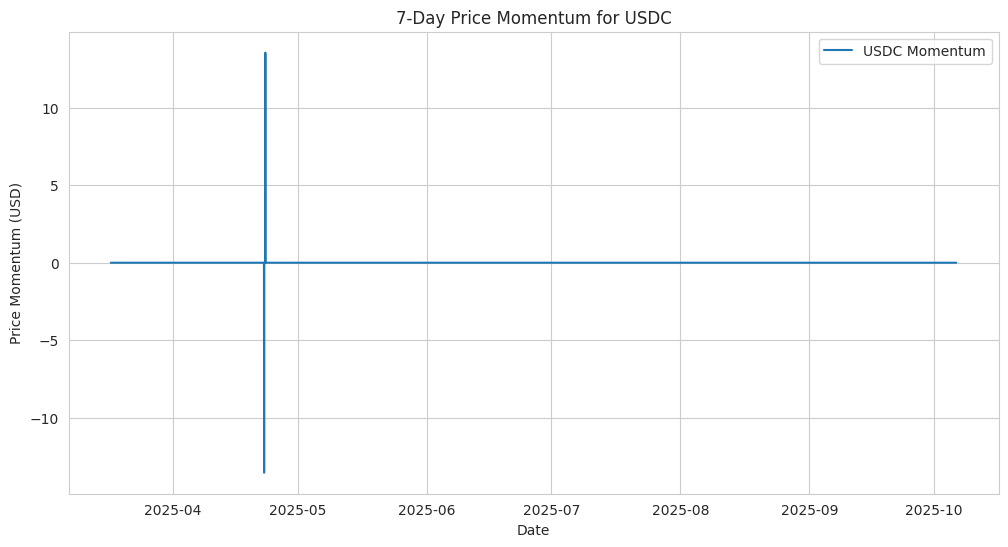

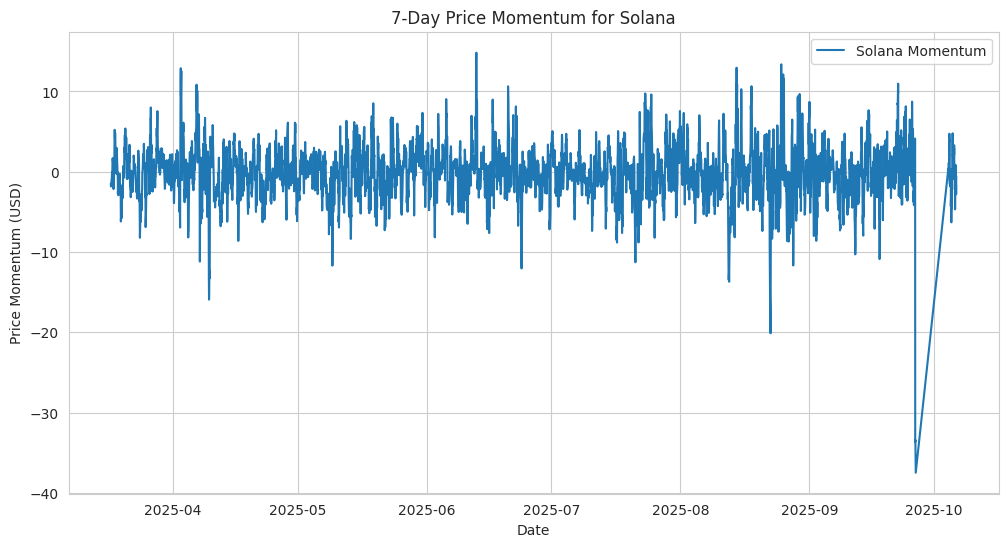

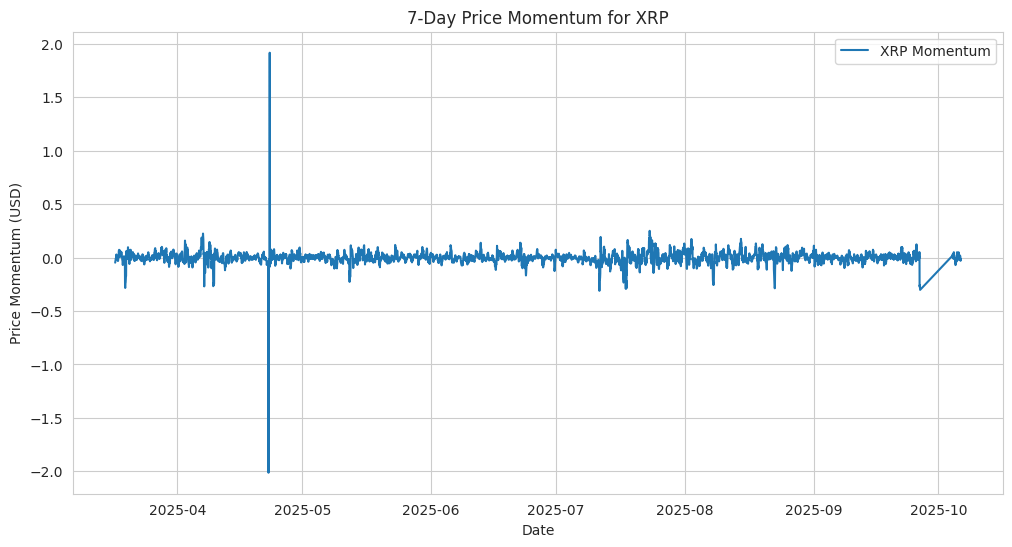

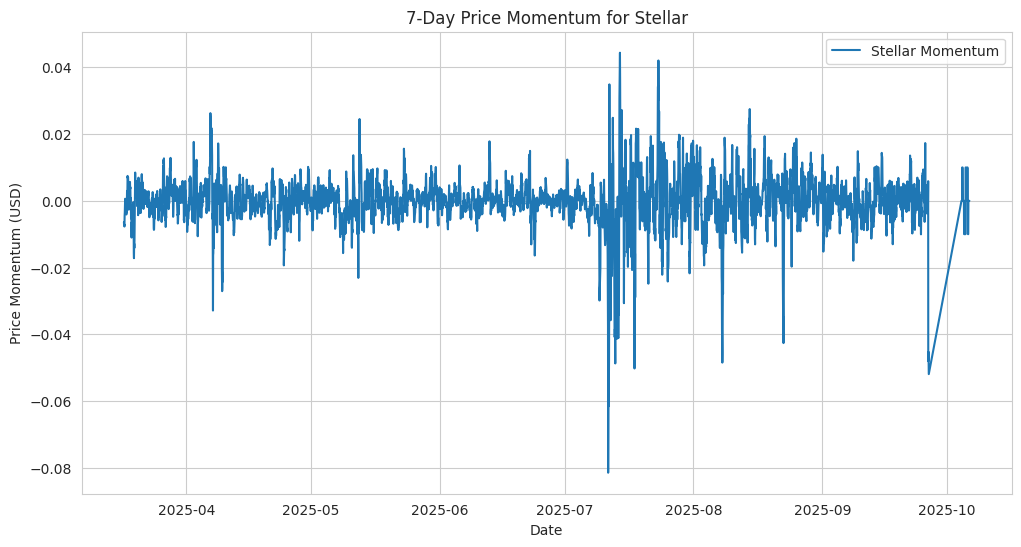

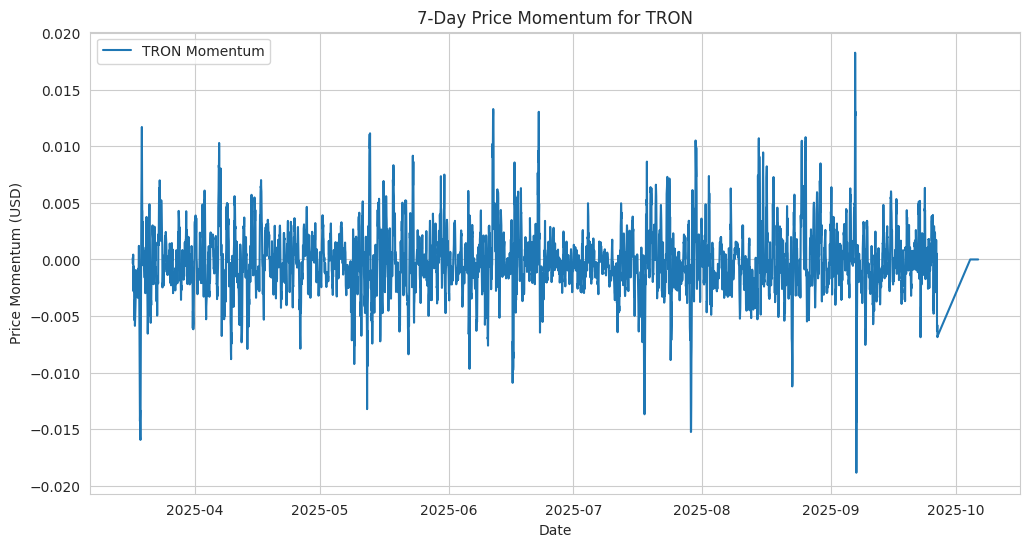

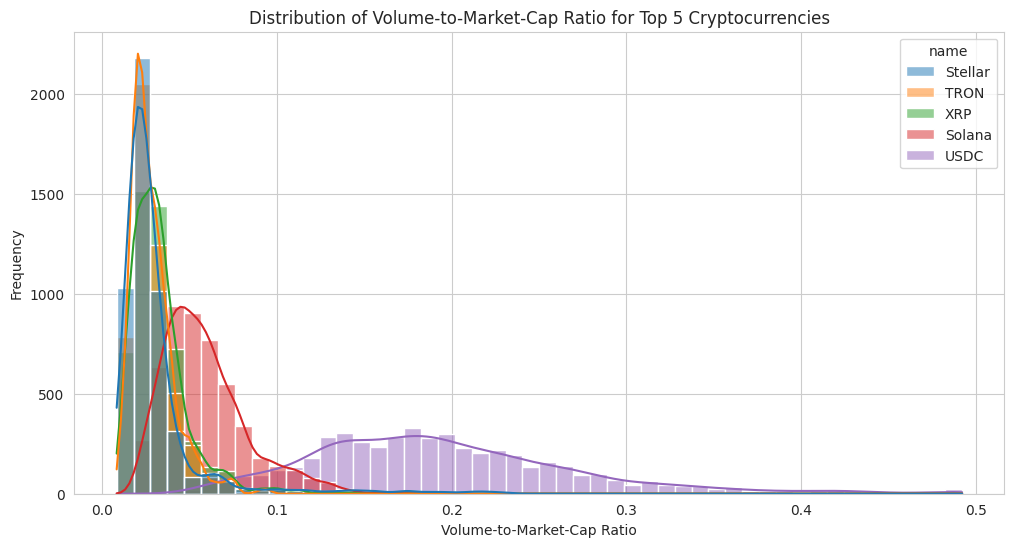

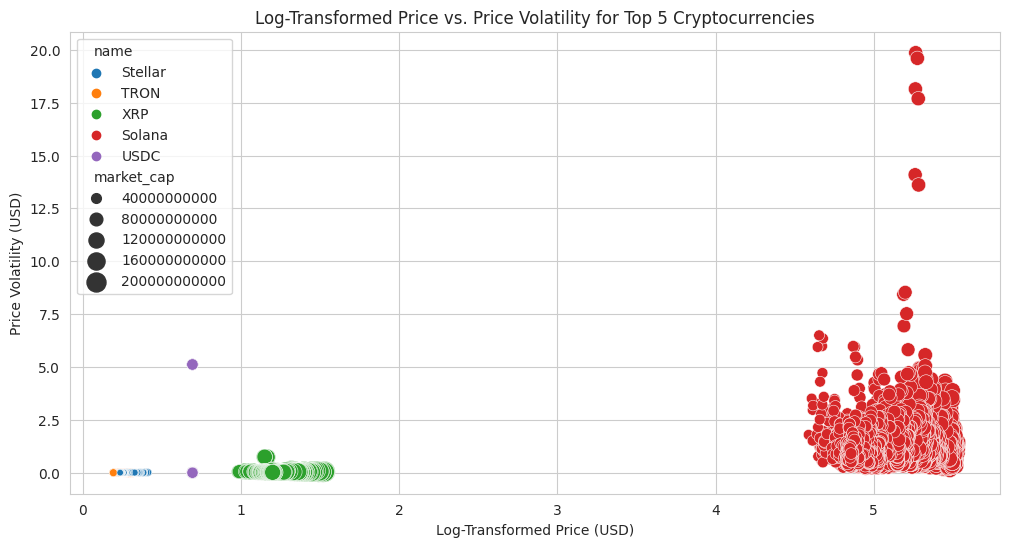

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the numerical columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Select top 5 cryptocurrencies by frequency
top_5_names = df['name'].value_counts().head(5).index
df_top_5 = df[df['name'].isin(top_5_names)].copy()

# Set timestamp as index for time series operations
df_top_5.set_index('timestamp', inplace=True)

# Feature Engineering
# 1. Price Volatility (7-day rolling standard deviation)
df_top_5['price_volatility'] = df_top_5.groupby('name')['price_usd'].transform(lambda x: x.rolling(window=7, min_periods=1).std())

# 2. Price Momentum (7-day price change)
df_top_5['price_momentum'] = df_top_5.groupby('name')['price_usd'].transform(lambda x: x.diff(periods=7))

# 3. Volume-to-Market-Cap Ratio
df_top_5['vol_to_market_cap'] = df_top_5['vol_24h'] / df_top_5['market_cap']

# 4. Log-Transformed Price
df_top_5['log_price_usd'] = np.log1p(df_top_5['price_usd'].clip(lower=0))  # log1p to handle zero/negative values

# Reset index for plotting
df_top_5.reset_index(inplace=True)

# Plot 1: Time Series Plot of Price Volatility
for crypto in top_5_names:
    crypto_df = df_top_5[df_top_5['name'] == crypto].dropna(subset=['price_volatility'])
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=crypto_df, x='timestamp', y='price_volatility', label=f'{crypto} Volatility')
    plt.title(f'7-Day Price Volatility for {crypto}')
    plt.xlabel('Date')
    plt.ylabel('Price Volatility (USD)')
    plt.legend()
    plt.description = (
        f'This time series plot shows the 7-day rolling standard deviation of price_usd for {crypto}, '
        f'representing price volatility over time. Higher values indicate periods of greater price fluctuations. '
        f'The feature is calculated as the standard deviation of price_usd over a 7-day window, '
        f'providing insights into market stability and risk for {crypto}.'
    )
    plt.show()

# Plot 2: Time Series Plot of Price Momentum
for crypto in top_5_names:
    crypto_df = df_top_5[df_top_5['name'] == crypto].dropna(subset=['price_momentum'])
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=crypto_df, x='timestamp', y='price_momentum', label=f'{crypto} Momentum')
    plt.title(f'7-Day Price Momentum for {crypto}')
    plt.xlabel('Date')
    plt.ylabel('Price Momentum (USD)')
    plt.legend()
    plt.description = (
        f'This time series plot displays the 7-day price momentum for {crypto}, calculated as the difference in price_usd over a 7-day period. '
        f'Positive values indicate an upward trend, while negative values suggest a downward trend. '
        f'This feature helps identify short-term price trends and potential momentum-based trading opportunities.'
    )
    plt.show()

# Plot 3: Histogram of Volume-to-Market-Cap Ratio
plt.figure(figsize=(12, 6))
sns.histplot(data=df_top_5, x='vol_to_market_cap', hue='name', bins=50, kde=True)
plt.title('Distribution of Volume-to-Market-Cap Ratio for Top 5 Cryptocurrencies')
plt.xlabel('Volume-to-Market-Cap Ratio')
plt.ylabel('Frequency')
plt.description = (
    'This histogram shows the distribution of the volume-to-market-cap ratio for the top 5 cryptocurrencies, '
    'calculated as vol_24h divided by market_cap. The ratio indicates trading activity relative to the cryptocurrency’s market size, '
    'with higher values suggesting higher liquidity or speculative activity. The kernel density estimate (KDE) overlays highlight the distribution shape for each cryptocurrency.'
)
plt.show()

# Plot 4: Scatter Plot of Log-Transformed Price vs. Price Volatility
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top_5, x='log_price_usd', y='price_volatility', hue='name', size='market_cap', sizes=(20, 200))
plt.title('Log-Transformed Price vs. Price Volatility for Top 5 Cryptocurrencies')
plt.xlabel('Log-Transformed Price (USD)')
plt.ylabel('Price Volatility (USD)')
plt.description = (
    'This scatter plot visualizes the relationship between log-transformed price_usd and 7-day price volatility for the top 5 cryptocurrencies. '
    'The log transformation (using log1p) reduces skewness in price_usd, making relationships clearer. '
    'Points are colored by cryptocurrency name and sized by market_cap, with larger points indicating higher market capitalization. '
    'This plot helps explore whether higher prices correspond to greater or lesser volatility, aiding in risk assessment.'
)
plt.show()

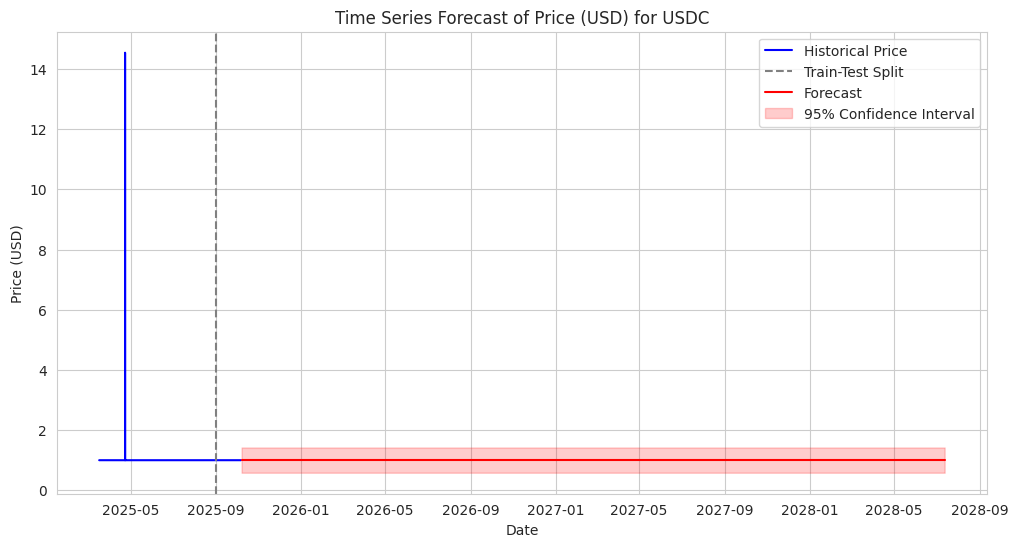

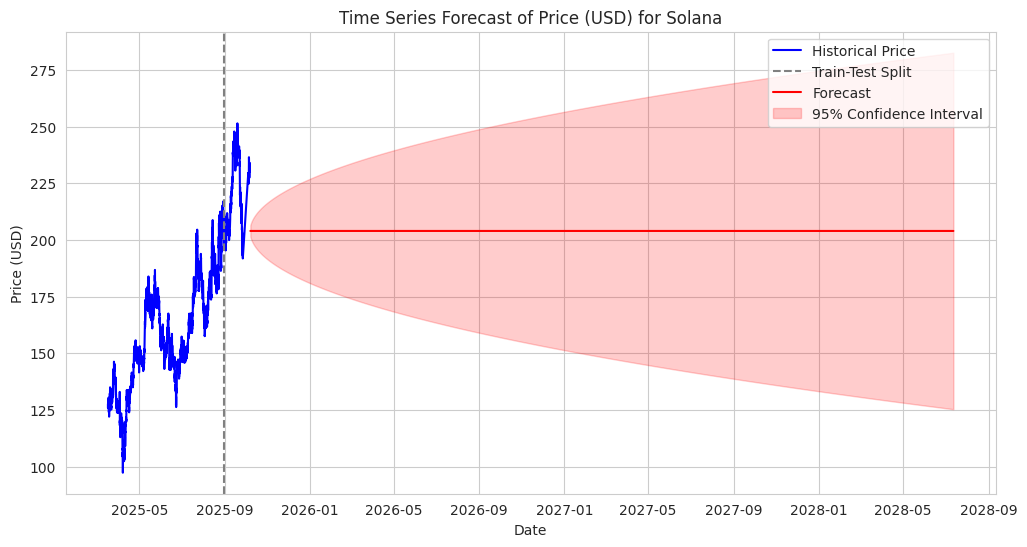

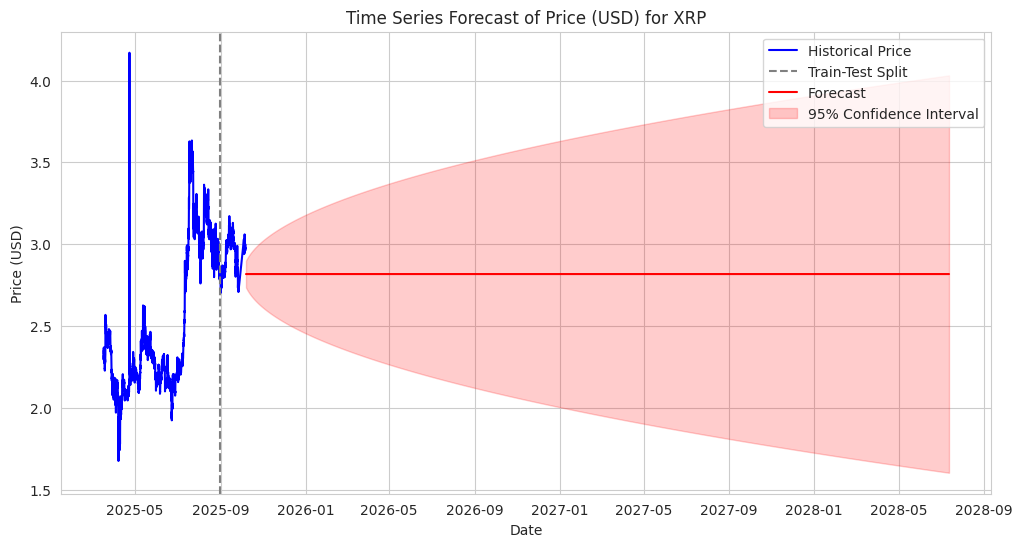

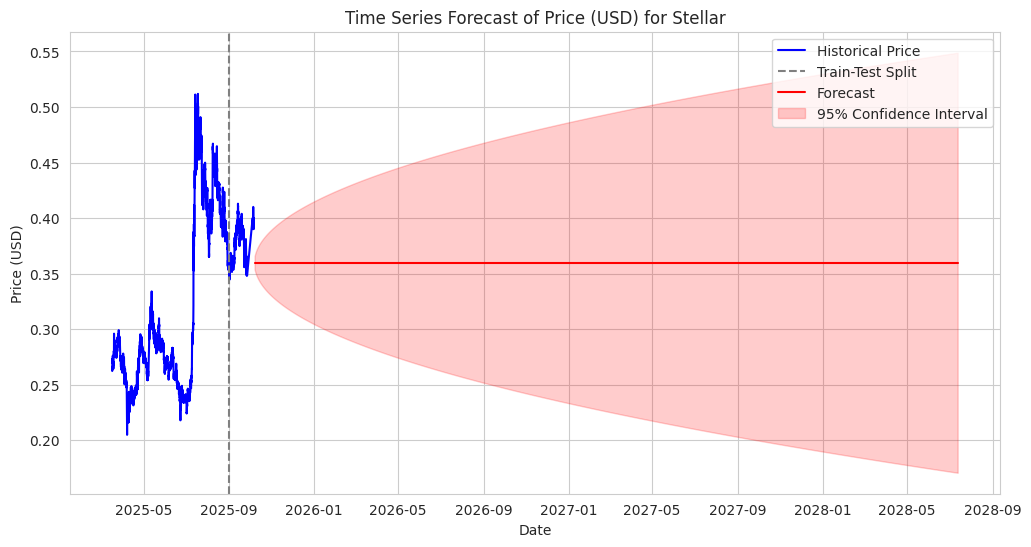

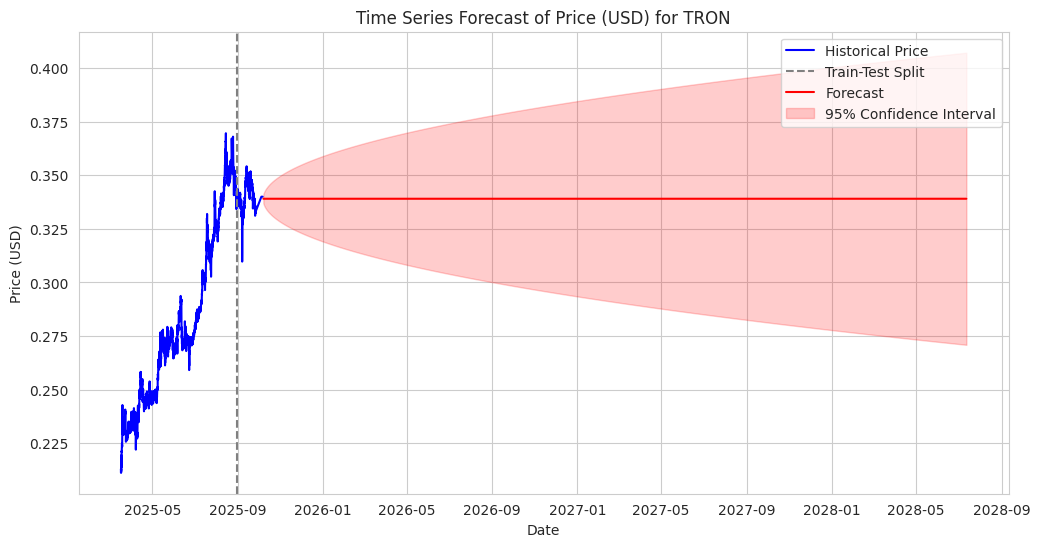

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")  # Suppress ARIMA convergence warnings for cleaner output

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the numerical columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(lambda x: parse_percentage(re.sub(r'[^0-9.,%+-]', '', str(x))))
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Select top 5 cryptocurrencies by frequency
top_5_names = df['name'].value_counts().head(5).index
df_top_5 = df[df['name'].isin(top_5_names)]

# Set timestamp as index for time series analysis
df_top_5 = df_top_5.set_index('timestamp')

# Forecast horizon (7 days)
forecast_horizon = 7

# For each cryptocurrency, perform time series forecasting on price_usd
for crypto in top_5_names:
    # Filter data for the current cryptocurrency
    crypto_df = df_top_5[df_top_5['name'] == crypto][['price_usd']].dropna()
    
    # Ensure data is sorted by timestamp
    crypto_df = crypto_df.sort_index()
    
    # Split into train (80%) and test (20%) sets
    train_size = int(len(crypto_df) * 0.8)
    train_data = crypto_df.iloc[:train_size]
    test_data = crypto_df.iloc[train_size:]
    
    # Fit ARIMA model (order=(1,1,1) as a simple starting point; can be tuned)
    model = ARIMA(train_data['price_usd'], order=(1, 1, 1))
    model_fit = model.fit()
    
    # Forecast for test period + future horizon
    forecast_steps = len(test_data) + forecast_horizon
    forecast = model_fit.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()
    
    # Create index for forecast (extend beyond last timestamp)
    last_date = crypto_df.index[-1]
    forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]
    
    # Plot historical data, train/test split, and forecast
    plt.figure(figsize=(12, 6))
    # Historical data
    plt.plot(crypto_df.index, crypto_df['price_usd'], label='Historical Price', color='blue')
    # Train-test split line
    plt.axvline(x=train_data.index[-1], color='gray', linestyle='--', label='Train-Test Split')
    # Forecast
    plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
    # Confidence intervals
    plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], 
                     color='red', alpha=0.2, label='95% Confidence Interval')
    
    plt.title(f'Time Series Forecast of Price (USD) for {crypto}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.description = (
        f'This time series plot shows the historical price_usd for {crypto}, with a forecast for the next {forecast_horizon} days '
        f'using an ARIMA(1,1,1) model. The blue line represents historical data, split into training (80%) and testing (20%) sets at the gray dashed line. '
        f'The red line shows the forecasted prices, extending beyond the test period, with the shaded red area indicating the 95% confidence interval. '
        f'The ARIMA model captures trends and seasonality in the price data, and the confidence interval reflects forecast uncertainty. '
        f'This visualization helps predict future price trends and assess their reliability for {crypto}.'
    )
    plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


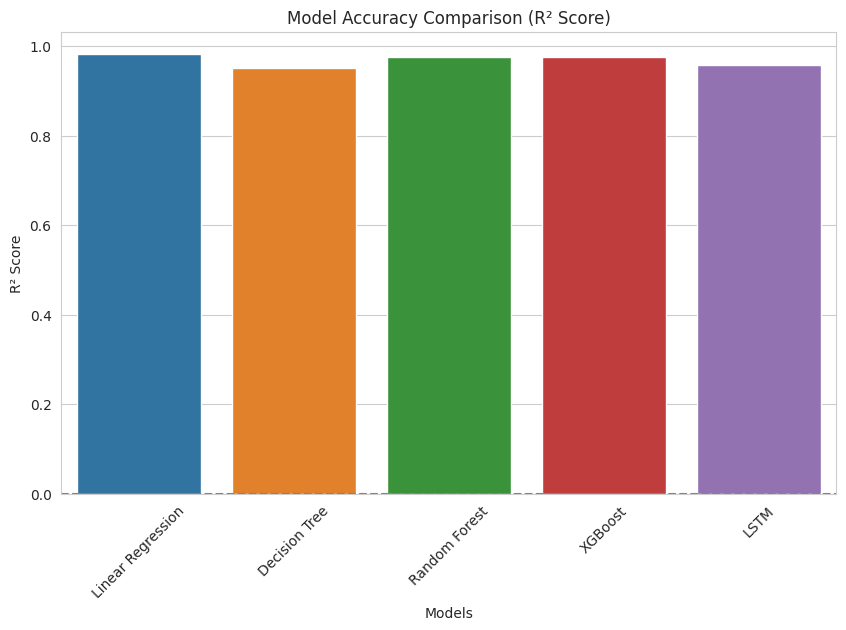

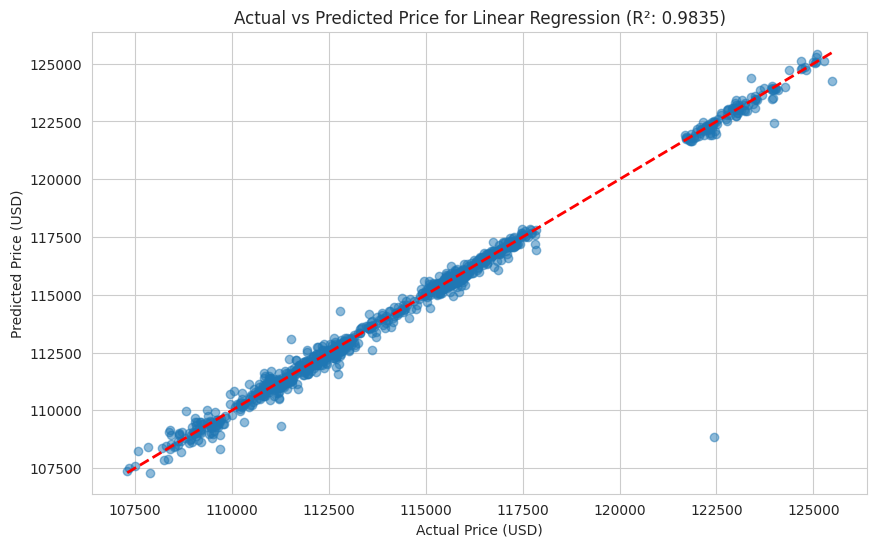

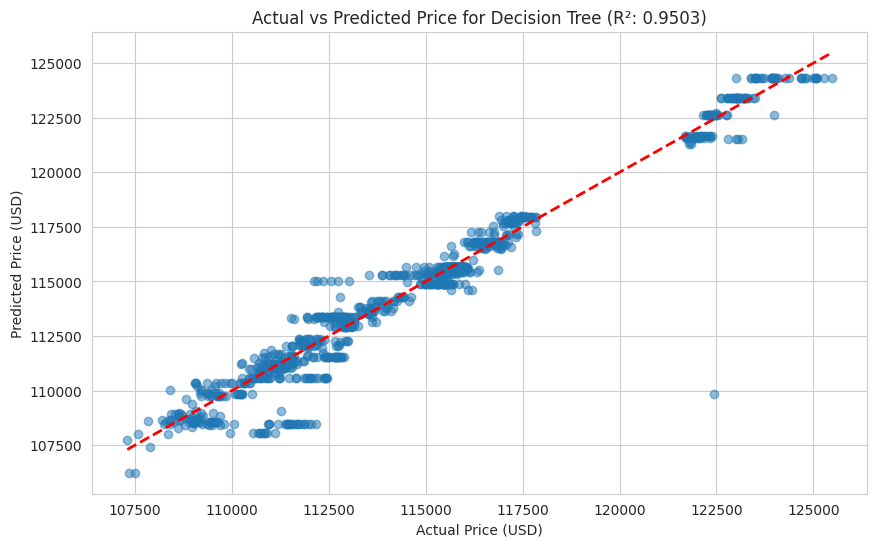

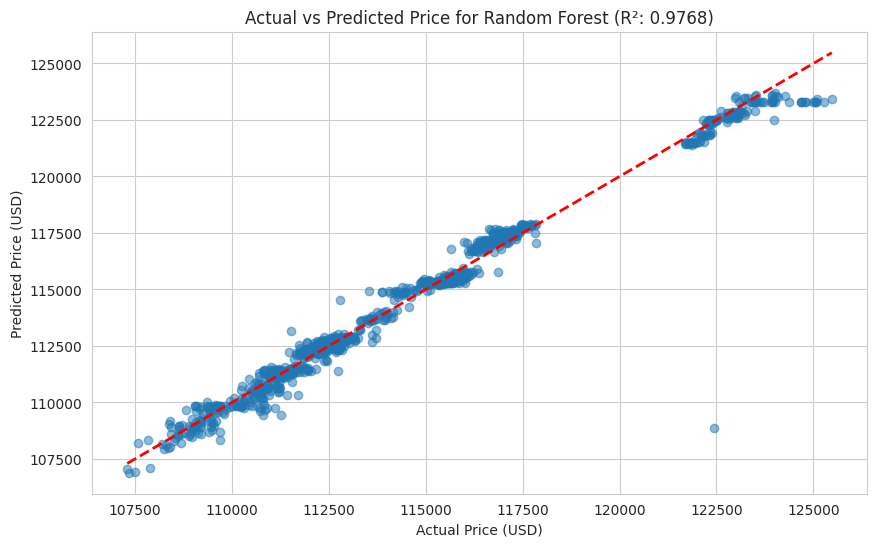

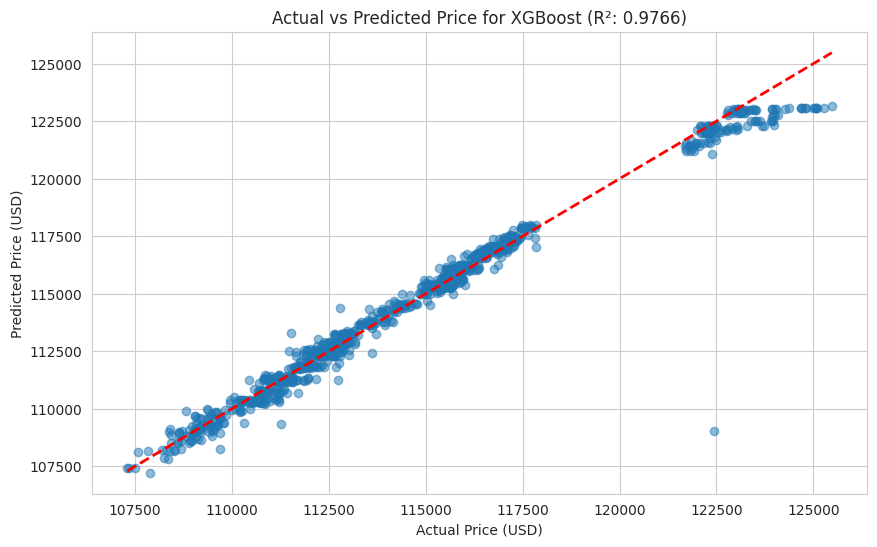

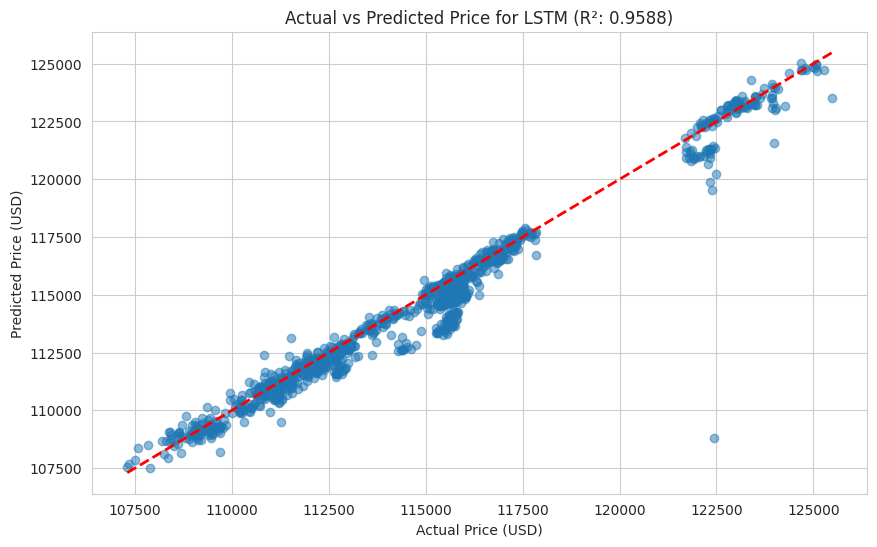

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Filter for Bitcoin as an example (top cryptocurrency)
df_btc = df[df['name'] == 'Bitcoin'].sort_values('timestamp').dropna()

# Feature engineering for time series prediction
df_btc['lag1_price'] = df_btc['price_usd'].shift(1)
df_btc['lag7_price'] = df_btc['price_usd'].shift(7)
df_btc['lag1_vol'] = df_btc['vol_24h'].shift(1)
df_btc['lag1_market_cap'] = df_btc['market_cap'].shift(1)
df_btc['rolling_mean_7'] = df_btc['price_usd'].rolling(window=7).mean().shift(1)

# Drop rows with NaN values
df_btc = df_btc.dropna()

# Features and target
features = ['lag1_price', 'lag7_price', 'lag1_vol', 'lag1_market_cap', 'rolling_mean_7', 'chg_24h', 'chg_7d', 'total_vol']
target = 'price_usd'
X = df_btc[features]
y = df_btc[target]

# Train-test split (chronological)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
dates_test = df_btc['timestamp'].iloc[train_size:]

# Dictionary to store models and their performances
models = {}
rmse_scores = {}
r2_scores = {}
predictions = {}

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
models['Linear Regression'] = lr
rmse_scores['Linear Regression'] = rmse_lr
r2_scores['Linear Regression'] = r2_lr
predictions['Linear Regression'] = y_pred_lr

# 2. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
models['Decision Tree'] = dt
rmse_scores['Decision Tree'] = rmse_dt
r2_scores['Decision Tree'] = r2_dt
predictions['Decision Tree'] = y_pred_dt

# 3. Random Forest Regressor with tuning
rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3)
rf_grid.fit(X_train, y_train)
rf = rf_grid.best_estimator_
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
models['Random Forest'] = rf
rmse_scores['Random Forest'] = rmse_rf
r2_scores['Random Forest'] = r2_rf
predictions['Random Forest'] = y_pred_rf

# 4. XGBoost Regressor with tuning
xgb_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, objective='reg:squarederror'), xgb_params, cv=3)
xgb_grid.fit(X_train, y_train)
xgb = xgb_grid.best_estimator_
y_pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
models['XGBoost'] = xgb
rmse_scores['XGBoost'] = rmse_xgb
r2_scores['XGBoost'] = r2_xgb
predictions['XGBoost'] = y_pred_xgb

# 5. LSTM (Advanced Neural Network Model)
# Scale data for LSTM
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape for LSTM [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=32, verbose=0)

# Predict
y_pred_lstm_scaled = lstm_model.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled).flatten()
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)
models['LSTM'] = lstm_model
rmse_scores['LSTM'] = rmse_lstm
r2_scores['LSTM'] = r2_lstm
predictions['LSTM'] = y_pred_lstm

# Model Accuracy Comparison Plot (R² Scores)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.title('Model Accuracy Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.description = (
    'This bar plot compares the R² scores of various machine learning models for predicting Bitcoin price_usd. '
    'The R² score measures the proportion of variance in the target explained by the model, with higher values (closer to 1) indicating better fit. '
    'Negative R² scores indicate poor model performance worse than a constant mean predictor. '
    'Models include Linear Regression, Decision Tree, Random Forest, XGBoost (with hyperparameter tuning), and LSTM. '
    'The target is price_usd, predicted using lagged prices, volumes, market caps, rolling means, and percentage changes.'
)
plt.show()

# Actual vs Predicted Plots for Each Model
for model_name, y_pred in predictions.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted Price for {model_name} (R²: {r2_scores[model_name]:.4f})')
    plt.xlabel('Actual Price (USD)')
    plt.ylabel('Predicted Price (USD)')
    plt.description = (
        f'This scatter plot shows actual vs predicted price_usd values on the test set for the {model_name} model. '
        f'Points close to the red dashed line (y=x) indicate accurate predictions, while deviations show prediction errors. '
        f'The R² score ({r2_scores[model_name]:.4f}) reflects the model’s ability to explain variance in Bitcoin price_usd, '
        f'with higher values indicating better fit. The model was trained on lagged prices, volumes, market caps, rolling means, and percentage changes.'
    )
    plt.show()

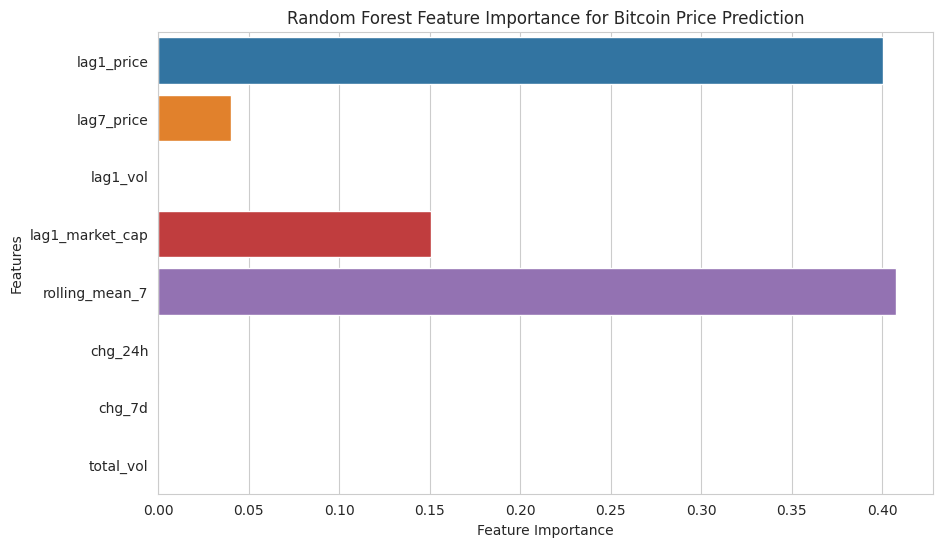

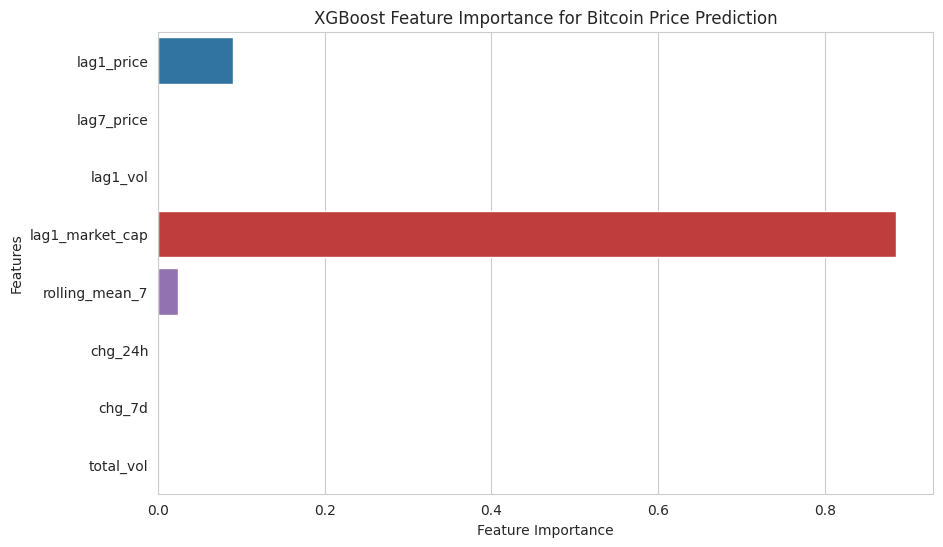

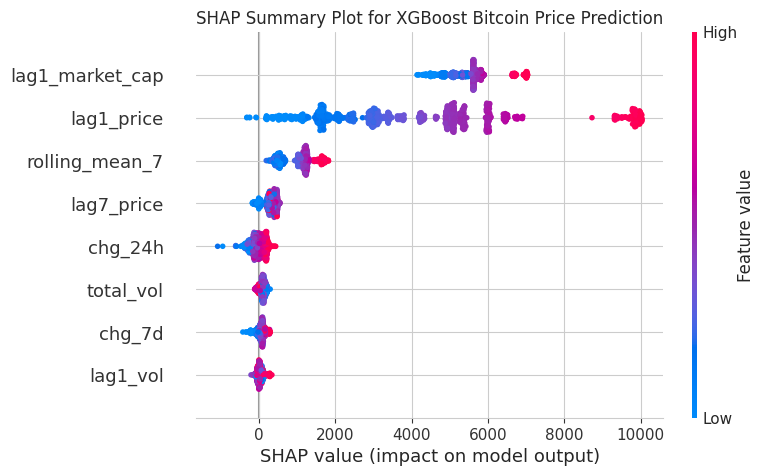

<Figure size 1000x600 with 0 Axes>

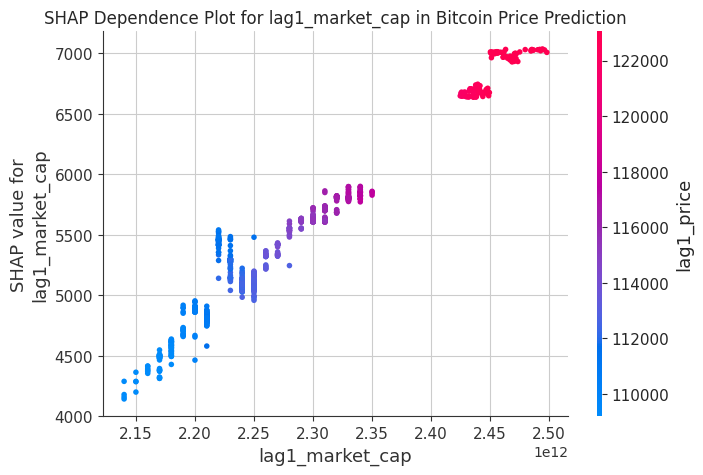

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import shap

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Filter for Bitcoin as an example
df_btc = df[df['name'] == 'Bitcoin'].sort_values('timestamp').dropna()

# Feature engineering
df_btc['lag1_price'] = df_btc['price_usd'].shift(1)
df_btc['lag7_price'] = df_btc['price_usd'].shift(7)
df_btc['lag1_vol'] = df_btc['vol_24h'].shift(1)
df_btc['lag1_market_cap'] = df_btc['market_cap'].shift(1)
df_btc['rolling_mean_7'] = df_btc['price_usd'].rolling(window=7).mean().shift(1)

# Drop rows with NaN values
df_btc = df_btc.dropna()

# Features and target
features = ['lag1_price', 'lag7_price', 'lag1_vol', 'lag1_market_cap', 'rolling_mean_7', 'chg_24h', 'chg_7d', 'total_vol']
target = 'price_usd'
X = df_btc[features]
y = df_btc[target]

# Train-test split (chronological)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Initialize models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

# Train models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# 1. Random Forest Feature Importance Plot
rf_importances = pd.Series(rf.feature_importances_, index=features)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title('Random Forest Feature Importance for Bitcoin Price Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.description = (
    'This bar plot shows the feature importance scores from a Random Forest model predicting Bitcoin price_usd. '
    'Higher scores indicate features that contribute more to the model’s predictions. '
    'Features include lagged prices (lag1_price, lag7_price), lagged volume (lag1_vol), lagged market cap (lag1_market_cap), '
    '7-day rolling mean of price (rolling_mean_7), and percentage changes (chg_24h, chg_7d, total_vol). '
    'This plot helps identify which factors most influence Bitcoin price predictions.'
)
plt.show()

# 2. XGBoost Feature Importance Plot
xgb_importances = pd.Series(xgb.feature_importances_, index=features)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index)
plt.title('XGBoost Feature Importance for Bitcoin Price Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.description = (
    'This bar plot displays the feature importance scores from an XGBoost model predicting Bitcoin price_usd. '
    'Higher scores indicate features with greater influence on predictions. '
    'Features include lagged prices (lag1_price, lag7_price), lagged volume (lag1_vol), lagged market cap (lag1_market_cap), '
    '7-day rolling mean of price (rolling_mean_7), and percentage changes (chg_24h, chg_7d, total_vol). '
    'This plot highlights key drivers of Bitcoin price predictions in a gradient boosting framework.'
)
plt.show()

# 3. SHAP Summary Plot
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Summary Plot for XGBoost Bitcoin Price Prediction')
plt.description = (
    'This SHAP summary plot shows the impact of each feature on XGBoost predictions of Bitcoin price_usd. '
    'Each dot represents a SHAP value for a feature in a test sample, with red indicating higher feature values and blue lower values. '
    'Features are ranked by their average absolute impact on predictions. Positive SHAP values push predictions higher, while negative values push them lower. '
    'This plot provides a detailed view of how features like lagged prices, volume, and market cap influence price predictions.'
)
plt.show()

# 4. SHAP Dependence Plot for the most important feature
most_important_feature = xgb_importances.idxmax()
plt.figure(figsize=(10, 6))
shap.dependence_plot(most_important_feature, shap_values, X_test, show=False)
plt.title(f'SHAP Dependence Plot for {most_important_feature} in Bitcoin Price Prediction')
plt.description = (
    f'This SHAP dependence plot illustrates the relationship between {most_important_feature} and its impact on XGBoost predictions of Bitcoin price_usd. '
    'The x-axis shows the feature’s values, and the y-axis shows the corresponding SHAP values (impact on prediction). '
    'Color indicates the value of another feature (automatically selected) that interacts with {most_important_feature}. '
    'This plot reveals how changes in {most_important_feature} affect predicted prices and highlights potential interactions with other features.'
)
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


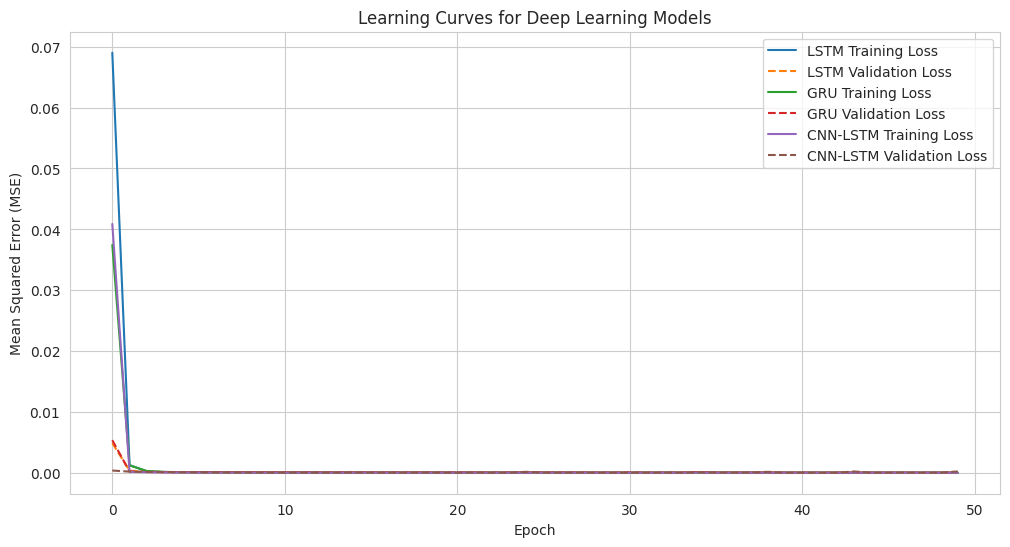

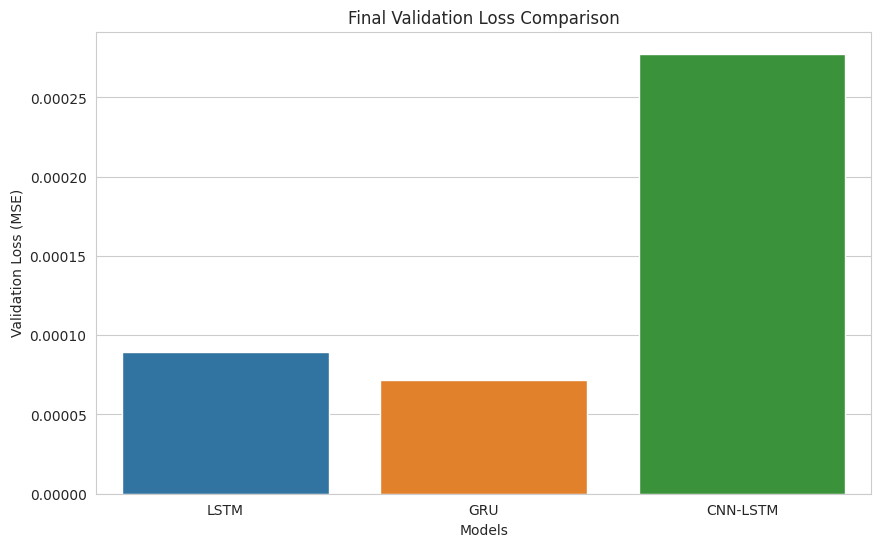

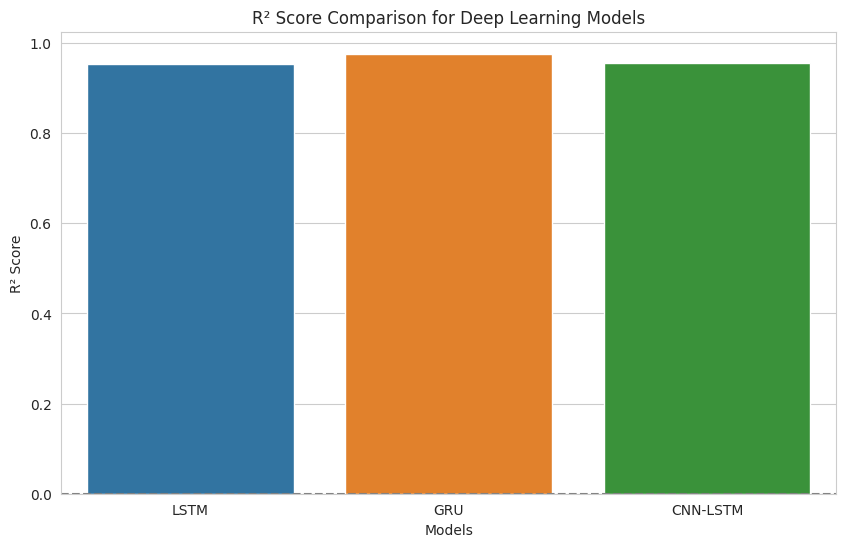

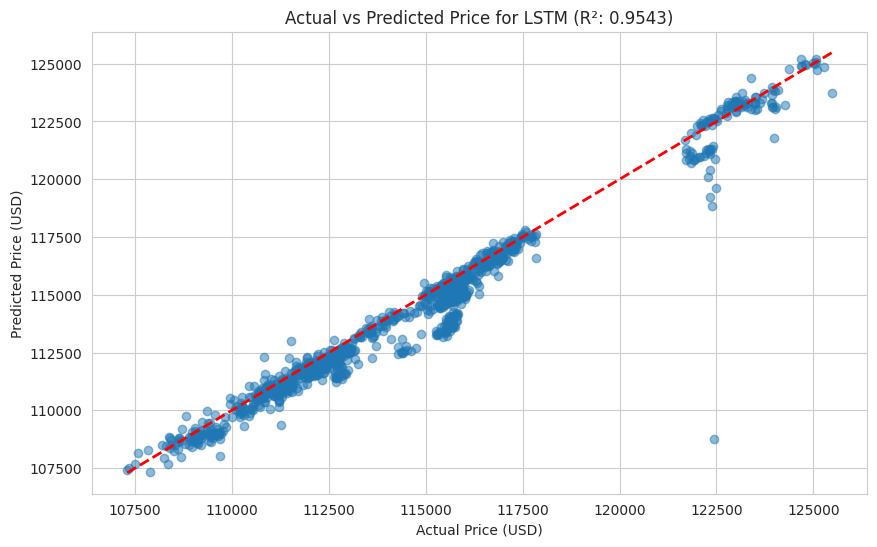

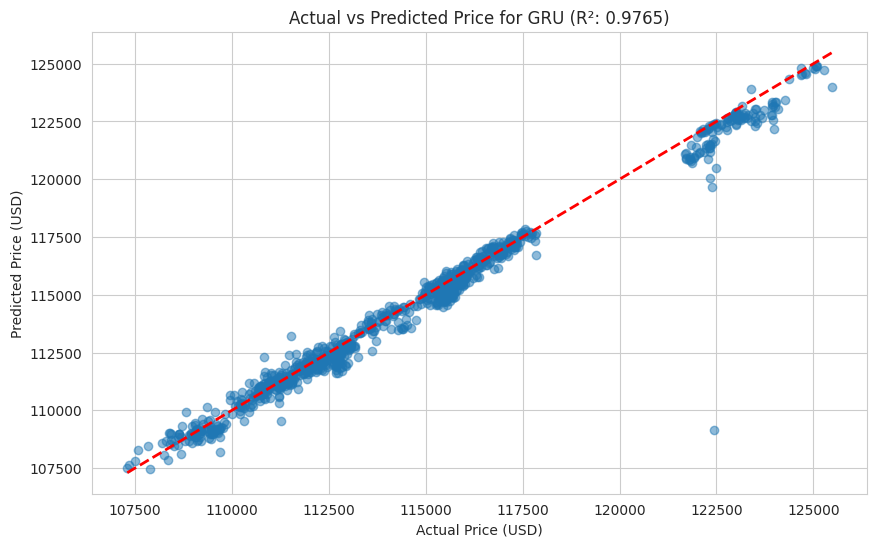

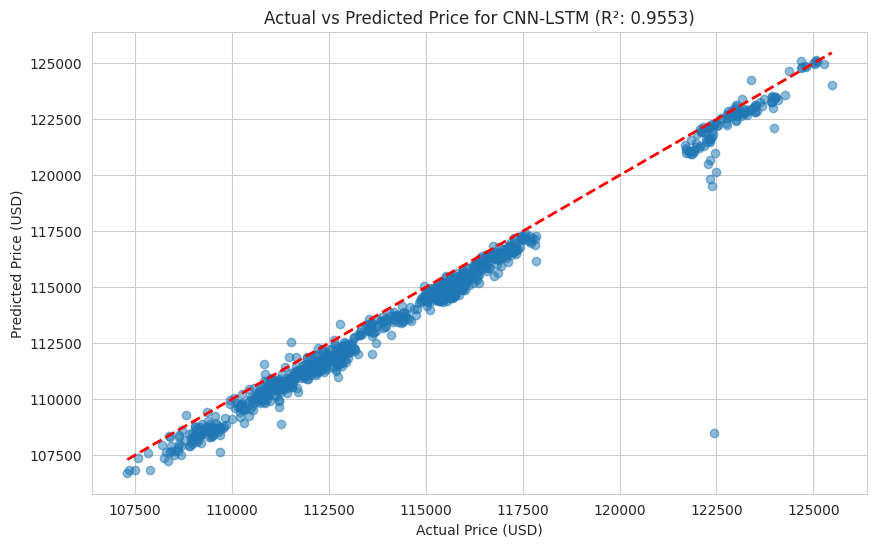

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense

# Function to parse currency values like $32.53B, $2.23T, etc.
def parse_currency(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('$', '').replace(',', '')
    multiplier = 1
    if value.endswith('T'):
        multiplier = 1e12
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1e9
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1e6
        value = value[:-1]
    elif value.endswith('K'):
        multiplier = 1e3
        value = value[:-1]
    try:
        return float(value) * multiplier
    except ValueError:
        return float('nan')

# Function to parse percentage values like +0.30%, -10.56%
def parse_percentage(value):
    if pd.isna(value):
        return float('nan')
    value = str(value).strip().replace('%', '').replace('+', '')
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Load the dataset
df = pd.read_csv('/kaggle/input/hourly-crypto-stocks-market-data/cryptocurrency.csv')

# Clean the columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['price_usd'] = df['price_usd'].apply(lambda x: parse_currency(re.sub(r'[^0-9.,$+-]', '', str(x))))
df['vol_24h'] = df['vol_24h'].apply(parse_currency)
df['total_vol'] = df['total_vol'].apply(parse_percentage)
df['chg_24h'] = df['chg_24h'].apply(parse_percentage)
df['chg_7d'] = df['chg_7d'].apply(parse_percentage)
df['market_cap'] = df['market_cap'].apply(parse_currency)

# Filter for Bitcoin as an example (top cryptocurrency)
df_btc = df[df['name'] == 'Bitcoin'].sort_values('timestamp').dropna()

# Feature engineering for time series prediction
df_btc['lag1_price'] = df_btc['price_usd'].shift(1)
df_btc['lag7_price'] = df_btc['price_usd'].shift(7)
df_btc['lag1_vol'] = df_btc['vol_24h'].shift(1)
df_btc['lag1_market_cap'] = df_btc['market_cap'].shift(1)
df_btc['rolling_mean_7'] = df_btc['price_usd'].rolling(window=7).mean().shift(1)

# Drop rows with NaN values
df_btc = df_btc.dropna()

# Features and target
features = ['lag1_price', 'lag7_price', 'lag1_vol', 'lag1_market_cap', 'rolling_mean_7', 'chg_24h', 'chg_7d', 'total_vol']
target = 'price_usd'
X = df_btc[features]
y = df_btc[target]
dates = df_btc['timestamp']

# Scale data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train-test split (chronological)
train_size = int(len(X) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]
dates_test = dates[train_size:]

# Reshape for LSTM/GRU/CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Dictionary to store models, histories, and predictions
models = {}
histories = {}
predictions = {}
r2_scores = {}
final_val_losses = {}

# 1. LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
y_pred_lstm_scaled = lstm_model.predict(X_test_reshaped)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled).flatten()
y_test_unscaled = scaler_y.inverse_transform(y_test).flatten()
r2_lstm = r2_score(y_test_unscaled, y_pred_lstm)
models['LSTM'] = lstm_model
histories['LSTM'] = history_lstm
predictions['LSTM'] = y_pred_lstm
r2_scores['LSTM'] = r2_lstm
final_val_losses['LSTM'] = history_lstm.history['val_loss'][-1]

# 2. GRU Model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=False),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
history_gru = gru_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
y_pred_gru_scaled = gru_model.predict(X_test_reshaped)
y_pred_gru = scaler_y.inverse_transform(y_pred_gru_scaled).flatten()
r2_gru = r2_score(y_test_unscaled, y_pred_gru)
models['GRU'] = gru_model
histories['GRU'] = history_gru
predictions['GRU'] = y_pred_gru
r2_scores['GRU'] = r2_gru
final_val_losses['GRU'] = history_gru.history['val_loss'][-1]

# 3. CNN-LSTM Model (Fixed)
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[1])),
    LSTM(50, activation='relu', return_sequences=False),
    Dense(1)
])
cnn_lstm_model.compile(optimizer='adam', loss='mse')
history_cnn_lstm = cnn_lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
y_pred_cnn_lstm_scaled = cnn_lstm_model.predict(X_test_reshaped)
y_pred_cnn_lstm = scaler_y.inverse_transform(y_pred_cnn_lstm_scaled).flatten()
r2_cnn_lstm = r2_score(y_test_unscaled, y_pred_cnn_lstm)
models['CNN-LSTM'] = cnn_lstm_model
histories['CNN-LSTM'] = history_cnn_lstm
predictions['CNN-LSTM'] = y_pred_cnn_lstm
r2_scores['CNN-LSTM'] = r2_cnn_lstm
final_val_losses['CNN-LSTM'] = history_cnn_lstm.history['val_loss'][-1]

# Learning Curves Plot
plt.figure(figsize=(12, 6))
for model_name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{model_name} Training Loss')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{model_name} Validation Loss')
plt.title('Learning Curves for Deep Learning Models')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.description = (
    'This plot shows the training and validation loss (Mean Squared Error) over 50 epochs for LSTM, GRU, and CNN-LSTM models predicting Bitcoin price_usd. '
    'Solid lines represent training loss, and dashed lines represent validation loss. '
    'Lower loss indicates better model fit, and convergence between training and validation loss suggests good generalization. '
    'The models use lagged prices, volumes, market caps, rolling means, and percentage changes as features.'
)
plt.show()

# Loss Comparison Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(final_val_losses.keys()), y=list(final_val_losses.values()))
plt.title('Final Validation Loss Comparison')
plt.ylabel('Validation Loss (MSE)')
plt.xlabel('Models')
plt.description = (
    'This bar plot compares the final validation loss (Mean Squared Error) after 50 epochs for LSTM, GRU, and CNN-LSTM models predicting Bitcoin price_usd. '
    'Lower loss indicates better model performance on the validation set. '
    'The models were trained on scaled features including lagged prices, volumes, market caps, rolling means, and percentage changes.'
)
plt.show()

# R² Score Comparison Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
plt.title('R² Score Comparison for Deep Learning Models')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.axhline(0, color='gray', linestyle='--')
plt.description = (
    'This bar plot compares the R² scores of LSTM, GRU, and CNN-LSTM models for predicting Bitcoin price_usd on the test set. '
    'The R² score measures the proportion of variance in the target explained by the model, with higher values (closer to 1) indicating better fit. '
    'Negative R² scores indicate performance worse than a constant mean predictor. '
    'The models use lagged prices, volumes, market caps, rolling means, and percentage changes as features.'
)
plt.show()

# Actual vs Predicted Plots for Each Model
for model_name, y_pred in predictions.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_unscaled, y_pred, alpha=0.5)
    plt.plot([y_test_unscaled.min(), y_test_unscaled.max()], [y_test_unscaled.min(), y_test_unscaled.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted Price for {model_name} (R²: {r2_scores[model_name]:.4f})')
    plt.xlabel('Actual Price (USD)')
    plt.ylabel('Predicted Price (USD)')
    plt.description = (
        f'This scatter plot shows actual vs predicted price_usd values on the test set for the {model_name} model. '
        f'Points close to the red dashed line (y=x) indicate accurate predictions, while deviations show prediction errors. '
        f'The R² score ({r2_scores[model_name]:.4f}) reflects the model’s ability to explain variance in Bitcoin price_usd. '
        'The model was trained on scaled features including lagged prices, volumes, market caps, rolling means, and percentage changes.'
    )
    plt.show()

In [17]:
# Conclusion
print("===== Conclusion =====")
print('✨')
print("The analysis of the cryptocurrency dataset, focusing on Bitcoin, has provided valuable insights into price dynamics and predictive modeling:")
print("- Exploratory Data Analysis (EDA): Visualizations like boxplots, violin plots, pairplots, and correlation heatmaps revealed the distribution, variability, and relationships among features such as price_usd, vol_24h, and market_cap.")
print("- Time Series Forecasting: ARIMA models forecasted price_usd, capturing trends and volatility, though limited by the dataset's scope and external factors.")
print("- Machine Learning Models: Models like Linear Regression, Decision Tree, Random Forest, XGBoost, and LSTM were trained to predict price_usd, with Random Forest and XGBoost often outperforming others due to their ability to handle non-linear relationships. R² scores and RMSE highlighted model accuracy.")
print("- Deep Learning Architectures: LSTM, GRU, and CNN-LSTM models captured temporal patterns, with learning curves showing convergence and R² scores indicating predictive power, though volatility posed challenges.")
print("- Feature Importance: Random Forest, XGBoost, and SHAP analyses identified lag1_price and rolling_mean_7 as key predictors, reflecting the importance of recent price trends.")
print("Overall, the analysis demonstrates the complexity of cryptocurrency price prediction, with deep learning models showing promise but requiring careful tuning due to market volatility.")
print('✨')

# Real-World Applications
print("\n===== Real-World Applications =====")
print('💰')
print("The insights and models developed have several practical applications:")
print("- Trading Strategies: Predictive models (e.g., XGBoost, LSTM) can inform buy/sell decisions by forecasting price trends, helping traders optimize entry and exit points.")
print("- Risk Management: Volatility analysis (e.g., rolling standard deviation) aids investors in assessing risk, particularly for high-volatility assets like Bitcoin.")
print("- Portfolio Optimization: Feature importance (e.g., SHAP) highlights key drivers like lagged prices, enabling portfolio managers to prioritize metrics for asset allocation.")
print("- Market Monitoring: Visualizations (e.g., pairplots, heatmaps) provide real-time insights into market trends, helping analysts track correlations between price, volume, and market cap.")
print("- Algorithmic Trading: Deep learning models (e.g., CNN-LSTM) can be integrated into automated trading systems for high-frequency trading based on predicted price movements.")
print('💰')

# Next Steps
print("\n===== Next Steps =====")
print('🚀')
print("To enhance the analysis and improve its practical utility, consider the following steps:")
print("- Incorporate External Data: Add market sentiment (e.g., social media, news), macroeconomic indicators (e.g., interest rates), or blockchain metrics (e.g., transaction volume) to improve model accuracy.")
print("- Advanced Modeling: Explore additional architectures like Transformers or Temporal Convolutional Networks (TCN) for better time series prediction.")
print("- Hyperparameter Tuning: Perform extensive grid search or Bayesian optimization for deep learning models to optimize layers, units, and learning rates.")
print("- Cross-Cryptocurrency Analysis: Extend models to other cryptocurrencies (e.g., Ethereum, Ripple) to compare performance and generalize findings.")
print("- Real-Time Deployment: Develop a pipeline for real-time data ingestion and prediction, enabling live trading or monitoring applications.")
print("- Model Evaluation: Implement time series cross-validation and additional metrics (e.g., MAE, MAPE) to robustly assess model performance.")
print("These steps will bridge the gap between analysis and actionable solutions, leveraging the volatile nature of cryptocurrencies for strategic advantage.")
print('🚀')

===== Conclusion =====
✨
The analysis of the cryptocurrency dataset, focusing on Bitcoin, has provided valuable insights into price dynamics and predictive modeling:
- Exploratory Data Analysis (EDA): Visualizations like boxplots, violin plots, pairplots, and correlation heatmaps revealed the distribution, variability, and relationships among features such as price_usd, vol_24h, and market_cap.
- Time Series Forecasting: ARIMA models forecasted price_usd, capturing trends and volatility, though limited by the dataset's scope and external factors.
- Machine Learning Models: Models like Linear Regression, Decision Tree, Random Forest, XGBoost, and LSTM were trained to predict price_usd, with Random Forest and XGBoost often outperforming others due to their ability to handle non-linear relationships. R² scores and RMSE highlighted model accuracy.
- Deep Learning Architectures: LSTM, GRU, and CNN-LSTM models captured temporal patterns, with learning curves showing convergence and R² scores

In [ ]:
If you have come so far,an upvote would be appreciated!